# Capstone Hotel reservation prediction

![Logo](img/hotel-logo.png)

## Content of this notebook:
- Feature engineering
- EDA

## Feature Engeneering and EDA

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

#### Loading cleaned dataset

In [2]:
df = pd.read_csv("data/cleaned_dataset.csv", index_col=0, encoding="iso-8859-15")

In [3]:
df.head()

,buchungsdatum,anreisedatum,abreisedatum,naechte_insgesamt,gebuchte_naechte,personen_anzahl,gesamtpreis,saison,buchung_telefon,buchung_online,buchung_reisebuero,zimmerarten,reise_adventure,reise_relax,reise_standard,reise_genuss,kind,entfernung,zahler,kunden_id,buchungsnr,buchungsnr_reisebuero,menue_code,zusatzleistung,destination,anrede,plz,ort,kein_email_ad,kein_brief_ad,kein_anruf_ad,kein_katalog_ad,kein_sms_ad,keine_werbung,kundenclub,jahrgangsalter_klassiert,bundesland,einwohner_adjusted_plz,bev_m_plz,bev_w_plz,bev_insgesamt_ort,bev_weiblich_ort,bev_maennlich_ort,qkm_plz,flaeche_ort,einwohnerdichte_prokm2_plz,haushalte_regiog_2017_plz,kaufkraft_einwohner_in_eur_regio,kk_einwohner_index_regiog_2017,kk_hh_index_regiog_2017,gemeindetyp_regiostar_2016,wirtschaftskraftmr1,wirtschaftskraftmr2
0,2010-01-29,2010-04-02,2010-04-10,8.0,8,2,2982,2010,0,0,1,classic,0,0,0,1,0,535.48,1,1,1151,456,5,5,linz,Herr,29664,Walsrode,0,0,0,0,0,0,0,55-64,Niedersachsen,25173,12540,12633,25173,11577,11491,344.326464,344.326464,73.108,11453,20641.89,92.819,98.104,Landregion - Zentrale Stadt,-0.333392,-0.388738
1,2010-01-14,2010-04-05,2010-04-10,5.0,5,2,1437,2010,0,0,1,classic,0,0,1,0,0,544.72,0,2,40,6413,5,5,linz,Frau,50226,Frechen,1,1,1,1,1,1,0,55-64,Nordrhein-Westfalen,52473,25645,26828,52473,26828,25645,45.118960,45.118960,1162.992,26227,25268.58,113.623,111.379,Landregion - Zentrale Stadt,0.853802,-0.345112
2,2010-03-01,2010-04-05,2010-04-10,5.0,5,2,1737,2010,0,0,1,classic,0,0,1,0,0,606.63,0,3,2134,4322,5,5,linz,Herr,23970,Wismar,0,0,0,0,0,0,0,75-84,Mecklenburg-Vorpommern,1423,692,731,46442,21844,20706,50.563027,83.131346,17.117,6355,18697.65,84.076,73.665,"Stadtregion - Kleinstädtischer, dörflicher Raum",-1.012536,-1.012536
3,2010-01-25,2010-03-21,2010-03-25,4.0,4,2,1047,2010,0,0,1,classic,0,1,0,0,0,421.59,1,4,776,6414,69,9,linz,Frau,15732,Eichwalde,0,0,0,0,0,0,0,65-74,Brandenburg,14690,7302,7388,14690,4135,4087,11.965427,11.965427,1227.704,7159,23442.06,105.410,104.087,Landregion - Städtischer Raum,0.417226,0.417226
4,2010-01-26,2010-03-07,2010-03-09,2.0,2,20,5279,2010,0,0,1,classic,1,0,0,0,0,37.88,0,5,813,2938,113,2,duesseldorf,Frau,53881,Euskirchen,0,0,0,0,0,0,1,45-54,Nordrhein-Westfalen,28531,13975,14556,57975,29578,28397,127.679129,139.430913,204.625,11683,23328.82,104.901,120.110,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.212335,-0.579173


## New Features

#### Weekday, week and quarter of booking, arrival and departure

also split booking, arrival and departure by year, month and day

In [4]:
df["buchungsdatum"]      = pd.to_datetime(df["buchungsdatum"])
df["buchungsjahr"]       = df["buchungsdatum"].dt.year
df["buchungsquartal"]    = df["buchungsdatum"].dt.quarter
df["buchungsmonat"]      = df["buchungsdatum"].dt.month
df["buchungswoche"]      = df["buchungsdatum"].dt.week
df["buchungstag"]        = df["buchungsdatum"].dt.dayofweek
df["buchung_wochentag"]  = df.buchungsdatum.dt.dayofweek

df["anreisedatum"]       = pd.to_datetime(df["anreisedatum"])
df["anreisejahr"]        = df["anreisedatum"].dt.year
df["anreisequartal"]     = df["anreisedatum"].dt.quarter
df["anreisemonat"]       = df["anreisedatum"].dt.month
df["anreisewoche"]       = df["anreisedatum"].dt.week
df["anreisetag"]         = df["anreisedatum"].dt.dayofweek
df["anreise_wochentag"]  = df.anreisedatum.dt.dayofweek

df["abreisedatum"]       = pd.to_datetime(df["abreisedatum"])
df["abreisejahr"]        = df["abreisedatum"].dt.year
df["abreisequartal"]     = df["abreisedatum"].dt.quarter
df["abreisemonat"]       = df["abreisedatum"].dt.month
df["abreisewoche"]       = df["abreisedatum"].dt.week
df["abreisetag"]         = df["abreisedatum"].dt.dayofweek
df["abreise_wochentag"]  = df.abreisedatum.dt.dayofweek

Additional features combining month/quarters with year

In [5]:
df["buchungsmonat-jahr"]   = df["buchungsjahr"].astype(str) + df["buchungsmonat"].astype(str)
df["buchungsquartal-jahr"] = df["buchungsjahr"].astype(str) + df["buchungsquartal"].astype(str)

df["anreisemonat-jahr"]    = df["anreisejahr"].astype(str) + df["anreisemonat"].astype(str)
df["anreisequartal-jahr"]  = df["anreisejahr"].astype(str) + df["anreisequartal"].astype(str)

df["abreisemonat-jahr"]    = df["abreisejahr"].astype(str) + df["abreisemonat"].astype(str)
df["abreisequartal-jahr"]  = df["abreisejahr"].astype(str) + df["abreisequartal"].astype(str)

#### renaming weekdays

In [6]:
aenderung = { 0: "Montag",
              1: "Dienstag",
              2: "Mittwoch",
              3: "Donnerstag",
              4: "Freitag",
              5: "Samstag",
              6: "Sonntag"
            }

df.buchung_wochentag.replace(aenderung, inplace=True)
df.anreise_wochentag.replace(aenderung, inplace=True)
df.abreise_wochentag.replace(aenderung, inplace=True)

#### Season (saison)
identifying season start and end month with new feature arrival year (anreisejahr) and depature year (abreisejahr)

In [7]:
print(f"{df.query('saison != anreisejahr').count()[0]} entries for saison are unequal the arrival year")
print(f"{df.query('saison != abreisejahr').count()[0]} entries for saison are unequal the departure year")
print(f"{df.query('saison != anreisejahr and saison != abreisejahr').count()[0]} entries of saison are not equal An- nor Abreisedatum")

print(f"\n{df.query('saison != anreisejahr and saison != abreisejahr and anreisemonat != 1').count()[0]} of these entries are with a different arrival date than January")
print(f"January is counting to the previous saison")

print(f"\n{df.query('anreisejahr > 2018 ').count()[0]} with year of arrival 2019 and higher.")
print(f"{df.query('buchungsjahr > 2018 ').count()[0]} with year of booking 2019 and higher.")

2445 entries for saison are unequal the arrival year
6526 entries for saison are unequal the departure year
2445 entries of saison are not equal An- nor Abreisedatum

0 of these entries are with a different arrival date than January
January is counting to the previous saison

13011 with year of arrival 2019 and higher.
0 with year of booking 2019 and higher.


#### Booking channel
reverse dummy variable

In [8]:
df['buchungskanal'] = 'reisebuero'

mask = df['buchung_telefon'] == 1
df.loc[mask, 'buchungskanal'] = 'Telefon'

mask = df['buchung_online'] == 1
df.loc[mask, 'buchungskanal'] = 'Online'

df.buchungskanal.value_counts()

reisebuero    156634
Telefon        23931
Online         17599
Name: buchungskanal, dtype: int64

#### Advertisment ban
reverse dummy variable

Since the general advertising ban is used incorretly, column dropped and the 8.090 entry with ban for every channel renamed to general.

In [9]:
df['werbe_ban'] = ''

mask = df['kein_email_ad'] == 1
df.loc[mask, 'werbe_ban'] = 'email, '

mask = df['kein_brief_ad'] == 1
df.loc[mask, 'werbe_ban'] += 'brief, '

mask = df['kein_anruf_ad'] == 1
df.loc[mask, 'werbe_ban'] += 'anruf, '

mask = df['kein_katalog_ad'] == 1
df.loc[mask, 'werbe_ban'] += 'katalog, '

mask = df['kein_sms_ad'] == 1
df.loc[mask, 'werbe_ban'] += 'sms, '

df.werbe_ban = df.werbe_ban.str.rstrip(', ')

mask = df['werbe_ban'] == ''
df.loc[mask, 'werbe_ban'] = 'keine'

df.werbe_ban = df.werbe_ban.replace("email, brief, anruf, katalog, sms", "generell")

# dropping also the other columns to create correct dummy variables in the modelling phase.
df.drop(['keine_werbung', 'kein_email_ad', 'kein_brief_ad', 'kein_anruf_ad','kein_katalog_ad','kein_sms_ad'] , axis=1, inplace=True)

df.werbe_ban.value_counts()

keine                         158307
email, brief                   18085
email, brief, anruf, sms       11264
generell                       10193
email, anruf, sms                 88
email                             63
brief, anruf, sms                 60
brief                             50
anruf, sms                        28
email, anruf, katalog, sms        14
brief, anruf, katalog, sms         7
email, katalog                     2
brief, katalog                     2
brief, anruf                       1
Name: werbe_ban, dtype: int64

Amount of advertisment channel bans (anz_werbe_ban)

In [10]:
df['anz_werbe_ban'] = 0

mask = (df['werbe_ban'] == 'email') | (df['werbe_ban'] == 'brief')
df.loc[mask, 'anz_werbe_ban'] = 1

mask = (df['werbe_ban'] == 'email, brief') | (df['werbe_ban'] == 'anruf, sms') | (df['werbe_ban'] == 'email, katalog') | (df['werbe_ban'] == 'brief, katalog') | (df['werbe_ban'] == 'brief, anruf')
df.loc[mask, 'anz_werbe_ban'] = 2

mask = (df['werbe_ban'] == 'email, anruf, sms') | (df['werbe_ban'] == 'brief, anruf, sms')
df.loc[mask, 'anz_werbe_ban'] = 3

mask = (df['werbe_ban'] == 'email, brief, anruf, sms') | (df['werbe_ban'] == 'email, anruf, katalog, sms') | (df['werbe_ban'] == 'brief, anruf, katalog, sms')
df.loc[mask, 'anz_werbe_ban'] = 4

mask = df['werbe_ban'] == 'generell'
df.loc[mask, 'anz_werbe_ban'] = 5

df.anz_werbe_ban.value_counts()

0    158307
2     18118
4     11285
5     10193
3       148
1       113
Name: anz_werbe_ban, dtype: int64

#### Nights stayed (aufenthalt)
check if depature date minus arrival date equals total nights (naechte_insgesamt)

In [11]:
df["aufenthalt"] = (df.abreisedatum - df.anreisedatum).astype('timedelta64[D]').astype('int64')
print(f'{len(df[df.naechte_insgesamt != df.gebuchte_naechte])} rows with different values for naechte_insgesamt and gebuchte_naechte.')
print(f'\n{len(df[df.naechte_insgesamt != df.aufenthalt])} rows with different values for naechte_insgesamt and aufenthalt.')
df.loc[df["naechte_insgesamt"] != df["aufenthalt"], ["naechte_insgesamt", "gebuchte_naechte", "aufenthalt"]].head()

7606 rows with different values for naechte_insgesamt and gebuchte_naechte.

825 rows with different values for naechte_insgesamt and aufenthalt.


,naechte_insgesamt,gebuchte_naechte,aufenthalt
26,4.0,5,5
56,3.0,4,4
61,3.0,4,4
65,3.0,4,4
67,4.0,5,5


replace missing values and  naechte_insgesamt > aufenthalt by aufenthalt

In [12]:
mask = df[df.naechte_insgesamt != df.aufenthalt]
df.loc[mask.index, "naechte_insgesamt"] = df.loc[mask.index, "aufenthalt"]

#### Nights in total (naechte_insgesamt)
filling the NaN from values of aufenthalt
and transfort naechte_insgesamt to integer

In [13]:
rows = df.loc[pd.isna(df.naechte_insgesamt)]
print(f"\n{len(rows)} entry with NaN for naechte_insgesamt.")

df["naechte_insgesamt"].fillna(df["aufenthalt"], inplace=True)

print(f"\n{df.naechte_insgesamt.apply(type).value_counts()}\n")
df.naechte_insgesamt = df.naechte_insgesamt.astype("int64")

rows = df.query('naechte_insgesamt > 22 or naechte_insgesamt == 0')
print(f"\n{len(rows)} rows with 0 or more than 22 nights in total dropped")
df.drop(rows.index, inplace=True)


0 entry with NaN for naechte_insgesamt.

<class 'float'>    198164
Name: naechte_insgesamt, dtype: int64


50 rows with 0 or more than 22 nights in total dropped


#### Nights out of hotel (naechte_ausserhalb)
naechte_insgesamt - gebuchte_naechte

In [14]:
df["naechte_ausserhalb"] = df.naechte_insgesamt - df.gebuchte_naechte
print(f"{df.naechte_ausserhalb.value_counts(dropna=False)}")
rows = df.query("naechte_ausserhalb < 0")
print(f"\n{len(rows)} nights out of hotel smaller 0 dropped.")
df.drop(rows.index, inplace=True)

0     191192
1       4826
2       1081
3        631
4        129
7         90
5         64
6         30
10        17
9         16
8         10
14        10
11         9
12         4
13         3
15         1
16         1
Name: naechte_ausserhalb, dtype: int64

0 nights out of hotel smaller 0 dropped.


In [15]:
rows = df.query("naechte_ausserhalb < 0")
print(f"\n{len(rows)} naechte_ausserhalb smaller 0 dropped.")
df.drop(rows.index, inplace=True)


0 naechte_ausserhalb smaller 0 dropped.


#### Amount of bookings per client id (ascending) (anz_buch)

In [16]:
df['anz_buch'] = df.groupby(df['kunden_id']).cumcount() + 1
print(f"\n{df['anz_buch'].value_counts().head()}")
print(f"\n{df['anz_buch'].value_counts().tail(3)}")
df[["anz_buch", "kunden_id", "buchungsdatum", "anreisedatum"]].sort_values(by=["kunden_id"])[10:14]


1    158478
2     24036
3      8064
4      3324
5      1589
Name: anz_buch, dtype: int64

48    2
47    2
54    2
Name: anz_buch, dtype: int64


,anz_buch,kunden_id,buchungsdatum,anreisedatum
12,3,10,2012-10-15,2012-11-06
10,1,10,2010-09-30,2010-10-30
11,2,10,2011-10-11,2011-10-23
13,1,11,2011-10-17,2011-10-23


AT the moment no repeater or booking are dropped.
Consider dropping bookings with more than 20 follow up bookings (only the 21 and above or all from that guest)

#### Lead time (Buchungsvorlauf)
how long in advance do the client book their room(s)?

In [17]:
df["buchungsvorlauf"] = (df.anreisedatum - df.buchungsdatum).astype('timedelta64[D]').astype('int64')
df.buchungsvorlauf.value_counts().head()

68    1057
61    1048
74    1046
60    1044
26    1038
Name: buchungsvorlauf, dtype: int64

#### ADR (average daily rate)
based on all bookings for a day for one property divided by booked rooms

In [18]:
# required a 2nd dataframe, should be implemented in the future

#### Price per Person

In [19]:
df["preis_per"] = round(df.gesamtpreis / df.personen_anzahl,2)

#### Price per day (for the booking)

In [20]:
df["preis_nacht"] = round(df.gesamtpreis / df.gebuchte_naechte,2)

#### Price per Day per person  (for the booking)

In [21]:
df["preis_nacht_per"] = round(df.preis_nacht / df.personen_anzahl,2)

#### VIP
(pays more than 75% of the median price)

In [22]:
quant_dus = df.query('destination == "duesseldorf"')['preis_nacht_per'].quantile(.75)
quant_lin = df.query('destination == "linz"')['preis_nacht_per'].quantile(.75)
quant_sai = df.query('destination == "saint etienne"')['preis_nacht_per'].quantile(.75)
quant_cha = df.query('destination == "chalons-sur-marne"')['preis_nacht_per'].quantile(.75)
quant_via = df.query('destination == "viana do castelo"')['preis_nacht_per'].quantile(.75)

df["VIP"] = 0

mask = (df['destination'] == 'duesseldorf') & (df['preis_nacht_per'] > quant_dus)
df.loc[mask, 'VIP'] = 1

mask = (df['destination'] == 'linz') & (df['preis_nacht_per'] > quant_lin)
df.loc[mask, 'VIP'] = 1

mask = (df['destination'] == 'saint etienne') & (df['preis_nacht_per'] > quant_sai)
df.loc[mask, 'VIP'] = 1

mask = (df['destination'] == 'chalons-sur-marne') & (df['preis_nacht_per'] > quant_cha)
df.loc[mask, 'VIP'] = 1

mask = (df['destination'] == 'viana do castelo') & (df['preis_nacht_per'] > quant_via)
df.loc[mask, 'VIP'] = 1

df.VIP.value_counts()

0    148699
1     49415
Name: VIP, dtype: int64

#### Row correspondant to the booking number
(Rows not rooms, since we got could have two rows for a double bed room booking as well as for two single bed room booking)

In [23]:
tmp = df["buchungsnr"].value_counts().to_frame()
df["buch_zeilen"] = df["buchungsnr"].map(tmp.set_index(tmp.index)["buchungsnr"])
df[["buchungsnr", "buch_zeilen", "personen_anzahl"]].sort_values(by=["buchungsnr"]).head(10)

,buchungsnr,buch_zeilen,personen_anzahl
11487,1,2,2
67341,1,2,2
58772,2,1,2
10158,3,2,2
118740,3,2,2
53856,4,2,2
60714,4,2,2
142836,5,3,11
136357,5,3,11
105426,5,3,11


check if the rows are corresponding to the amount of guests

In [24]:
df["Diff"] = df.buch_zeilen - df.personen_anzahl
print(f"{df['Diff'].value_counts(dropna=False)}")

print(f"\n{df.query('Diff < 0').count()[0]} rows with negative difference.")
print(f"This corresponds to {round(df.query('Diff < 0').count()[0]/df.shape[0]*100,2)} percent")

pd.set_option("display.max_rows", None)
print(df.groupby("destination")["Diff"].value_counts())
pd.set_option("display.max_rows", 10)

 0     125432
-1      53123
-2      10178
-3       4152
-4       1724
-5        947
-6        515
-7        407
-8        307
-9        229
-12       159
-10       139
-14        91
-17        73
-19        70
-24        67
-11        66
-13        59
-26        51
-18        50
-23        41
-16        34
-25        33
-15        32
-20        24
-52        22
-30        14
-31        14
-49        12
-22         9
-32         8
-42         8
-27         8
-44         6
-55         6
-21         3
-35         1
Name: Diff, dtype: int64

72682 rows with negative difference.
This corresponds to 36.69 percent
destination        Diff
chalons-sur-marne   0       2693
                   -1       1039
                   -2        209
                   -3         76
                   -5         11
                   -4          9
                   -7          1
duesseldorf         0      49700
                   -1      20869
                   -2       4065
                   -3       176

In [25]:
res = df.query("Diff < 0 and destination == 'linz'")
print(f"\n{len(res)} rows with negative difference für destination Linz.")

res = df.query("Diff < 0 and destination == 'duesseldorf'")
print(f"\n{len(res)} rows with negative difference für destination Duesseldorf.")

res = df.query("Diff < 0 and destination == 'saint etienne'")
print(f"\n{len(res)} rows with negative difference für destination Saint Etienne.")

res = df.query("Diff < 0 and destination == 'chalons-sur-marne'")
print(f"\n{len(res)} rows with negative difference für destination Chalons-Sur-Marne.")

res = df.query("Diff < 0 and destination == 'viana do castelo'")
print(f"\n{len(res)} rows with negative difference für destination Viana do Castelo.")

df.drop("Diff", axis=1, inplace=True)


35233 rows with negative difference für destination Linz.

28956 rows with negative difference für destination Duesseldorf.

6851 rows with negative difference für destination Saint Etienne.

1345 rows with negative difference für destination Chalons-Sur-Marne.

297 rows with negative difference für destination Viana do Castelo.


#### Initial booking
first booking by each client id

In [26]:
df.loc[df.groupby(['kunden_id'])['buchungsdatum'].idxmin(),'erstbuchung'] = 1
df.erstbuchung.fillna(0, inplace=True) 
df.erstbuchung = df.erstbuchung.astype("int64")
df.erstbuchung.value_counts()

1    158478
0     39636
Name: erstbuchung, dtype: int64

#### Follow-up booking (folgebuchung)

In [27]:
df.loc[df.groupby(['kunden_id'])['buchungsdatum'].idxmin(),'folgebuchung'] = 0
df.folgebuchung.fillna(1, inplace=True) 
df.folgebuchung = df.folgebuchung.astype("int64")
df.folgebuchung.value_counts()

0    158478
1     39636
Name: folgebuchung, dtype: int64

#### Repeater
guests who have more than one booking (flagged at every booking)

In [28]:
df['repeater'] = df['kunden_id'].duplicated(keep=False)

df.repeater = df.repeater.astype("int64")

print(f"{df.repeater.value_counts(dropna=False)}")

0    134442
1     63672
Name: repeater, dtype: int64


In [29]:
df.head()

,buchungsdatum,anreisedatum,abreisedatum,naechte_insgesamt,gebuchte_naechte,personen_anzahl,gesamtpreis,saison,buchung_telefon,buchung_online,buchung_reisebuero,zimmerarten,reise_adventure,reise_relax,reise_standard,reise_genuss,kind,entfernung,zahler,kunden_id,buchungsnr,buchungsnr_reisebuero,menue_code,zusatzleistung,destination,anrede,plz,ort,kundenclub,jahrgangsalter_klassiert,bundesland,einwohner_adjusted_plz,bev_m_plz,bev_w_plz,bev_insgesamt_ort,bev_weiblich_ort,bev_maennlich_ort,qkm_plz,flaeche_ort,einwohnerdichte_prokm2_plz,haushalte_regiog_2017_plz,kaufkraft_einwohner_in_eur_regio,kk_einwohner_index_regiog_2017,kk_hh_index_regiog_2017,gemeindetyp_regiostar_2016,wirtschaftskraftmr1,wirtschaftskraftmr2,buchungsjahr,buchungsquartal,buchungsmonat,buchungswoche,buchungstag,buchung_wochentag,anreisejahr,anreisequartal,anreisemonat,anreisewoche,anreisetag,anreise_wochentag,abreisejahr,abreisequartal,abreisemonat,abreisewoche,abreisetag,abreise_wochentag,buchungsmonat-jahr,buchungsquartal-jahr,anreisemonat-jahr,anreisequartal-jahr,abreisemonat-jahr,abreisequartal-jahr,buchungskanal,werbe_ban,anz_werbe_ban,aufenthalt,naechte_ausserhalb,anz_buch,buchungsvorlauf,preis_per,preis_nacht,preis_nacht_per,VIP,buch_zeilen,erstbuchung,folgebuchung,repeater
0,2010-01-29,2010-04-02,2010-04-10,8,8,2,2982,2010,0,0,1,classic,0,0,0,1,0,535.48,1,1,1151,456,5,5,linz,Herr,29664,Walsrode,0,55-64,Niedersachsen,25173,12540,12633,25173,11577,11491,344.326464,344.326464,73.108,11453,20641.89,92.819,98.104,Landregion - Zentrale Stadt,-0.333392,-0.388738,2010,1,1,4,4,Freitag,2010,2,4,13,4,Freitag,2010,2,4,14,5,Samstag,20101,20101,20104,20102,20104,20102,reisebuero,keine,0,8,0,1,63,1491.00,372.75,186.38,0,2,1,0,0
1,2010-01-14,2010-04-05,2010-04-10,5,5,2,1437,2010,0,0,1,classic,0,0,1,0,0,544.72,0,2,40,6413,5,5,linz,Frau,50226,Frechen,0,55-64,Nordrhein-Westfalen,52473,25645,26828,52473,26828,25645,45.118960,45.118960,1162.992,26227,25268.58,113.623,111.379,Landregion - Zentrale Stadt,0.853802,-0.345112,2010,1,1,2,3,Donnerstag,2010,2,4,14,0,Montag,2010,2,4,14,5,Samstag,20101,20101,20104,20102,20104,20102,reisebuero,generell,5,5,0,1,81,718.50,287.40,143.70,0,2,1,0,0
2,2010-03-01,2010-04-05,2010-04-10,5,5,2,1737,2010,0,0,1,classic,0,0,1,0,0,606.63,0,3,2134,4322,5,5,linz,Herr,23970,Wismar,0,75-84,Mecklenburg-Vorpommern,1423,692,731,46442,21844,20706,50.563027,83.131346,17.117,6355,18697.65,84.076,73.665,"Stadtregion - Kleinstädtischer, dörflicher Raum",-1.012536,-1.012536,2010,1,3,9,0,Montag,2010,2,4,14,0,Montag,2010,2,4,14,5,Samstag,20103,20101,20104,20102,20104,20102,reisebuero,keine,0,5,0,1,35,868.50,347.40,173.70,0,2,1,0,0
3,2010-01-25,2010-03-21,2010-03-25,4,4,2,1047,2010,0,0,1,classic,0,1,0,0,0,421.59,1,4,776,6414,69,9,linz,Frau,15732,Eichwalde,0,65-74,Brandenburg,14690,7302,7388,14690,4135,4087,11.965427,11.965427,1227.704,7159,23442.06,105.410,104.087,Landregion - Städtischer Raum,0.417226,0.417226,2010,1,1,4,0,Montag,2010,1,3,11,6,Sonntag,2010,1,3,12,3,Donnerstag,20101,20101,20103,20101,20103,20101,reisebuero,keine,0,4,0,1,55,523.50,261.75,130.88,0,1,1,0,0
4,2010-01-26,2010-03-07,2010-03-09,2,2,20,5279,2010,0,0,1,classic,1,0,0,0,0,37.88,0,5,813,2938,113,2,duesseldorf,Frau,53881,Euskirchen,1,45-54,Nordrhein-Westfalen,28531,13975,14556,57975,29578,28397,127.679129,139.430913,204.625,11683,23328.82,104.901,120.110,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.212335,-0.579173,2010,1,1,4,1,Dienstag,2010,1,3,9,6,Sonntag,2010,1,3,10,1,Dienstag,20101,20101,20103,20101,20103,20101,reisebuero,keine,0,2,0,1,40,263.95,2639.50,131.98,0,7,1,0,1


# Data Exploration

In [30]:
col_list = ["saison", "buchung_telefon", "buchung_online", "buchung_reisebuero",
            "reise_adventure", "reise_relax", "reise_standard", "reise_genuss", "kind", "zahler",
            "kunden_id", "buchungsnr", "buchungsnr_reisebuero", "menue_code", "zusatzleistung",
            "plz", "anz_werbe_ban", "kundenclub", "erstbuchung", "folgebuchung", "buchungsvorlauf"]

In [30]:
#frozen cell
statistics = round(df.describe(),2).T
statistics.drop("count", axis=1, inplace=True)
statistics.drop(col_list, axis=0, inplace=True)

pd.set_option("display.max_rows", None)
statistics

,mean,std,min,25%,50%,75%,max
naechte_insgesamt,6.08,2.24,1.00,4.00,7.00,7.00,22.00
gebuchte_naechte,6.02,2.17,1.00,4.00,7.00,7.00,21.00
personen_anzahl,3.31,4.06,1.00,2.00,2.00,4.00,77.00
gesamtpreis,4977.87,4228.59,120.00,2247.00,4052.00,6147.00,68686.00
entfernung,371.93,248.82,0.67,188.00,368.28,515.26,2140.60
einwohner_adjusted_plz,19196.66,11428.81,108.00,10661.00,18122.00,25598.00,65440.00
bev_m_plz,9420.72,5588.98,53.00,5233.00,8877.00,12548.00,32685.00
bev_w_plz,9775.94,5844.40,55.00,5399.00,9276.00,13074.00,32755.00
bev_insgesamt_ort,179590.61,368391.51,135.00,11600.00,32171.00,132366.00,1860977.00
bev_weiblich_ort,156890.27,375831.90,123.00,5761.00,17334.00,91910.00,1852025.00


In [ ]:
# set back to default
pd.set_option("display.max_rows", 10)

### Data Distribution
#### by sex

Frau     103168
Herr      94800
Firma       146
Name: anrede, dtype: int64


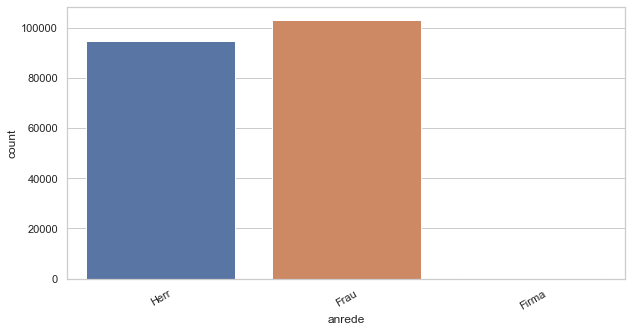

In [31]:
print(df.anrede.value_counts(dropna=False))
plt.figure(figsize=(10,5))
ax = sns.countplot(x="anrede", data=df)
ax.set_xticklabels(labels=df.anrede.unique(), rotation=30);

#### booking channel

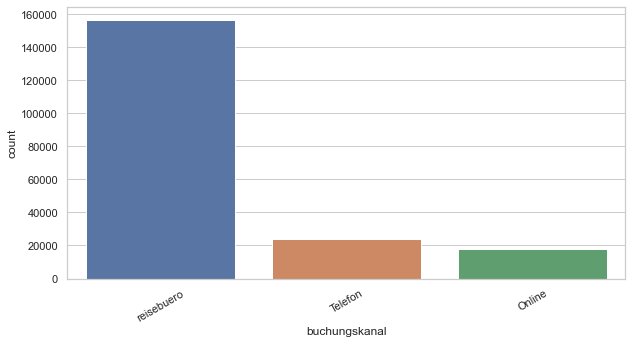

In [32]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="buchungskanal", data=df)
ax.set_xticklabels(labels=df.buchungskanal.unique(), rotation=30);

#### room caterory

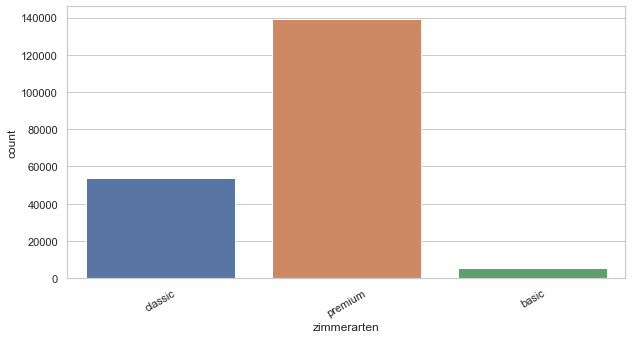

In [33]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="zimmerarten", data=df)
ax.set_xticklabels(labels=df.zimmerarten.unique(), rotation=30);

#### destination

In [34]:
df.destination.value_counts()

linz                 93973
duesseldorf          78656
saint etienne        20322
chalons-sur-marne     4038
viana do castelo      1125
Name: destination, dtype: int64

### by Age groups

Total nights and title

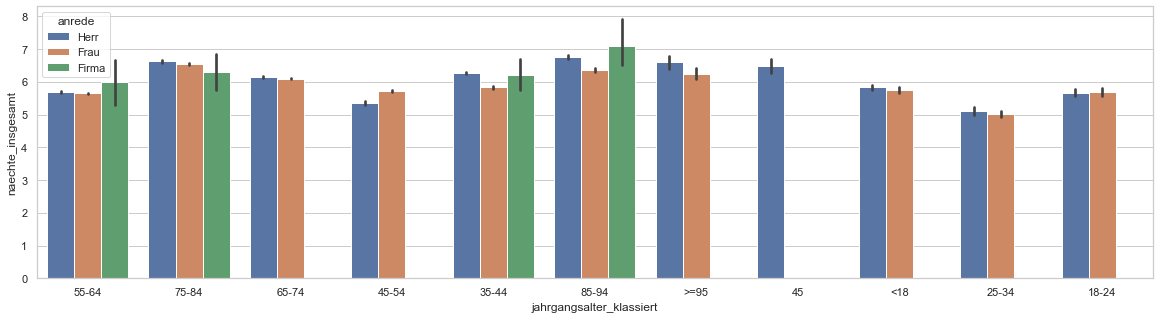

In [35]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="naechte_insgesamt", hue="anrede", data=df)

Total price and room category

premium    139088
classic     53873
basic        5153
Name: zimmerarten, dtype: int64


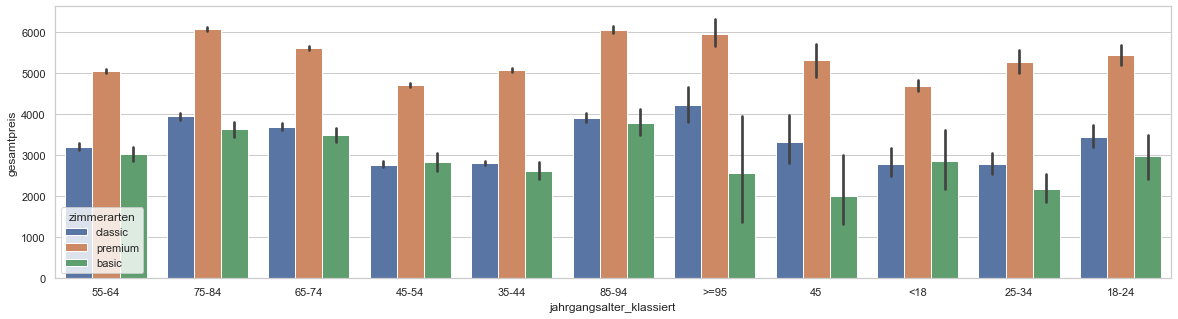

In [36]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="gesamtpreis", hue="zimmerarten", data=df)

Lead time

premium    139088
classic     53873
basic        5153
Name: zimmerarten, dtype: int64


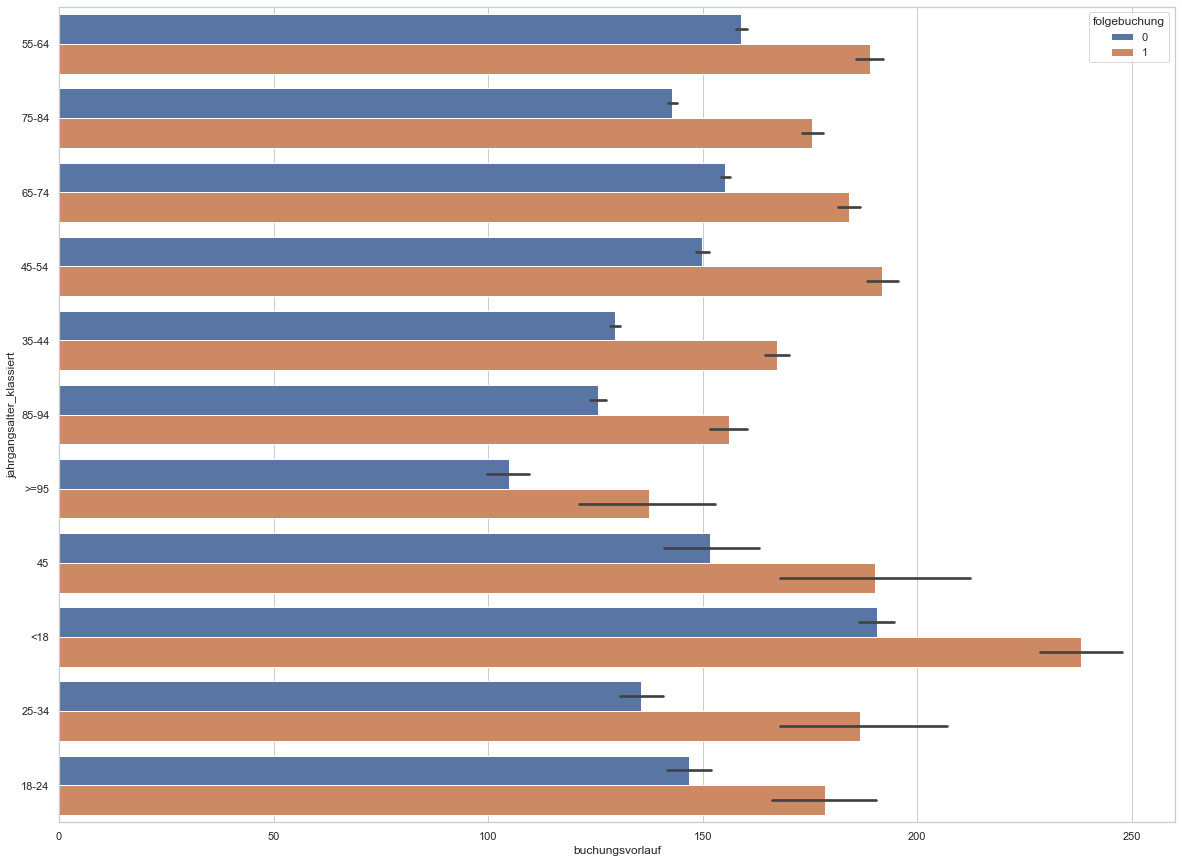

In [37]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,15))
ax = sns.barplot(x="buchungsvorlauf", y="jahrgangsalter_klassiert", hue="folgebuchung", data=df)

#### Followup bookings

premium    139088
classic     53873
basic        5153
Name: zimmerarten, dtype: int64


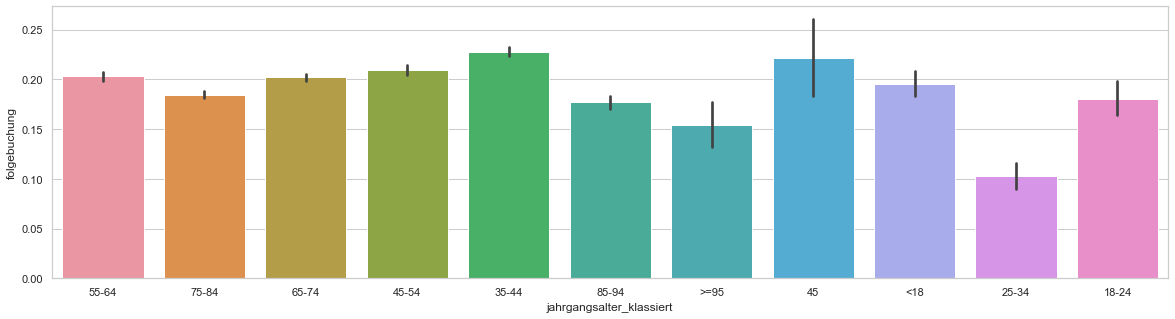

In [38]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="folgebuchung", data=df)

Club members

premium    139088
classic     53873
basic        5153
Name: zimmerarten, dtype: int64


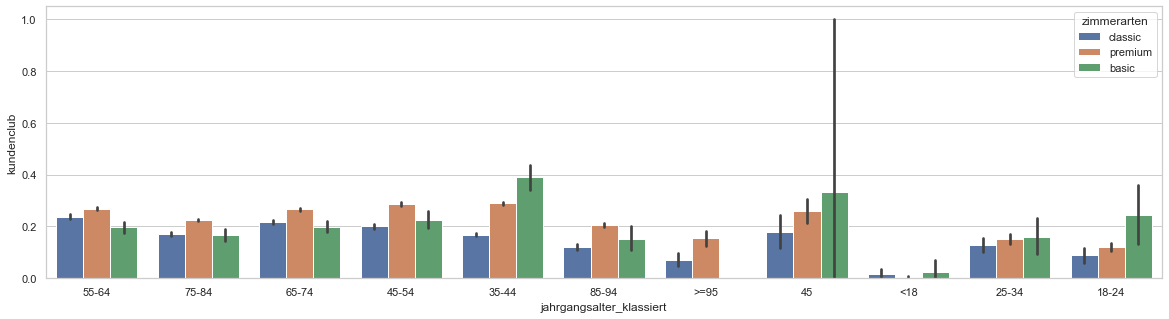

In [39]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="kundenclub", hue="zimmerarten", data=df)

## by Destination

#### Bookings

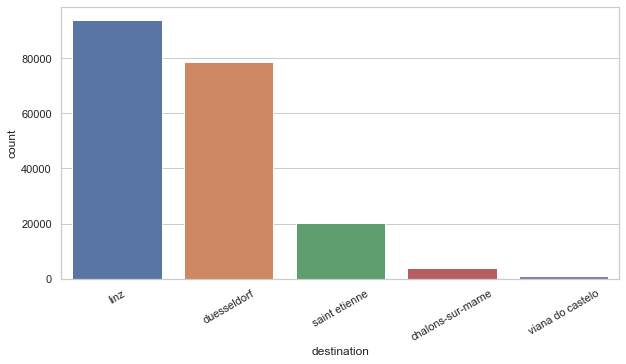

In [40]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="destination", data=df)
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

####  followup bookings
in total

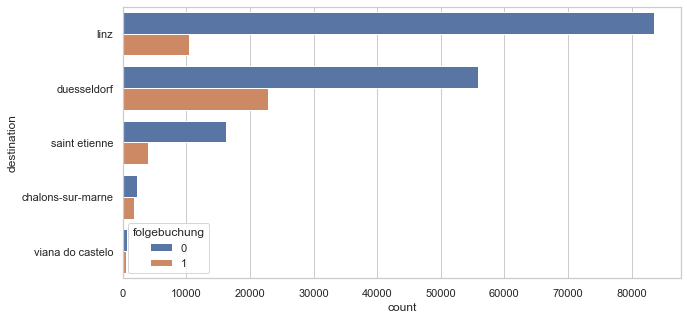

In [41]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="destination", hue="folgebuchung", data=df)

in relation

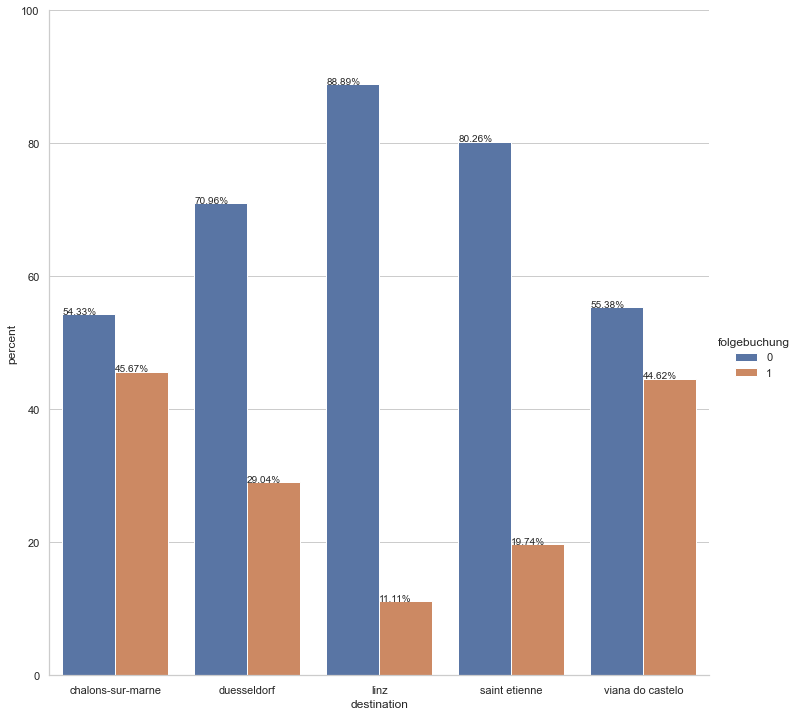

In [42]:
x,y = 'destination', 'folgebuchung'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Club member
in total

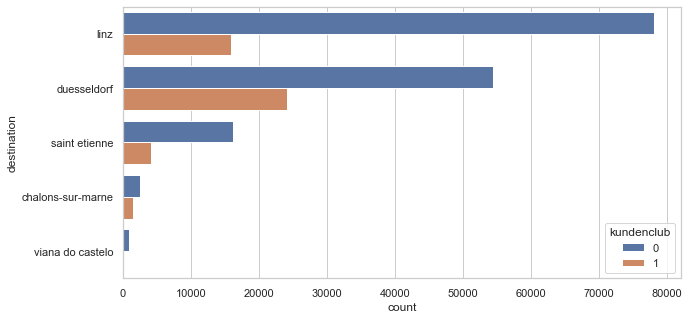

In [43]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="destination", hue="kundenclub", data=df)

in relation

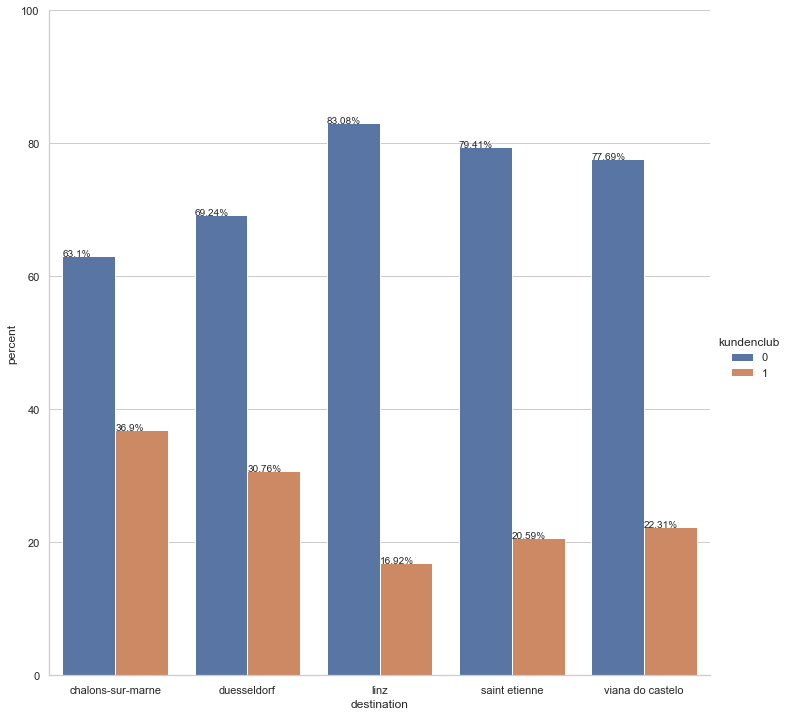

In [44]:
x,y = 'destination', 'kundenclub'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### length of stay

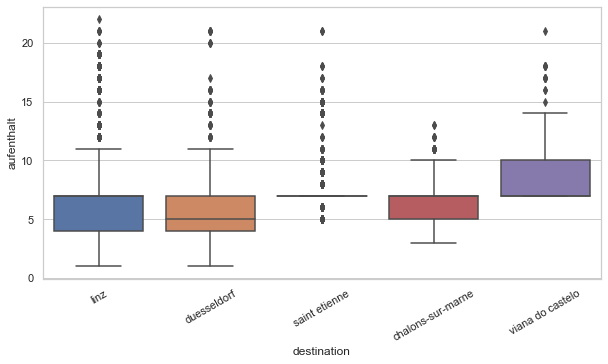

In [45]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="destination", y= "aufenthalt", data=df)
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### total amount paid

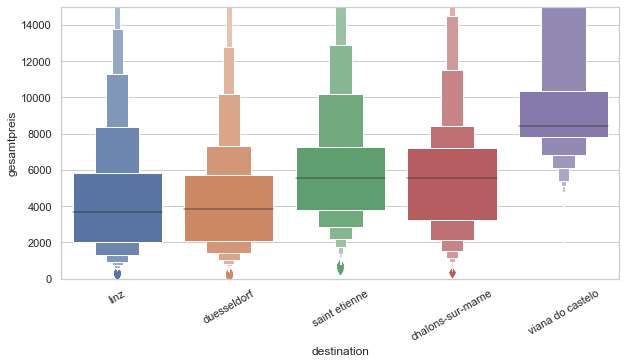

In [46]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "gesamtpreis", data=df)
ax.set(ylim=(0, 15_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### total distance

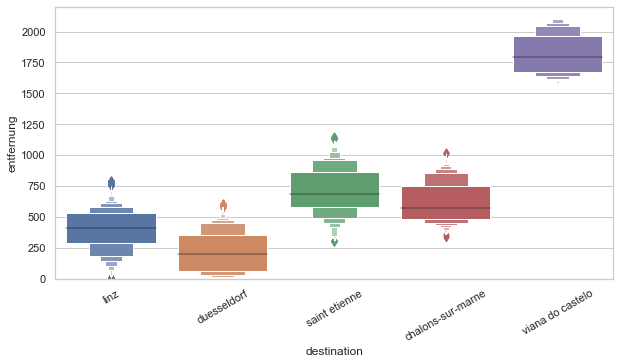

In [47]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "entfernung", data=df)
ax.set(ylim=(0, 2_200));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

## Followup bookings

#### Followup bookings and advertising allowance
- Many non repeater without a ban for any advertising channel, maybe not tracked correctly?
- Most guests chose more than one channel from which they did not want to receive advertising.
- Even most of the repeater prefer no advertising

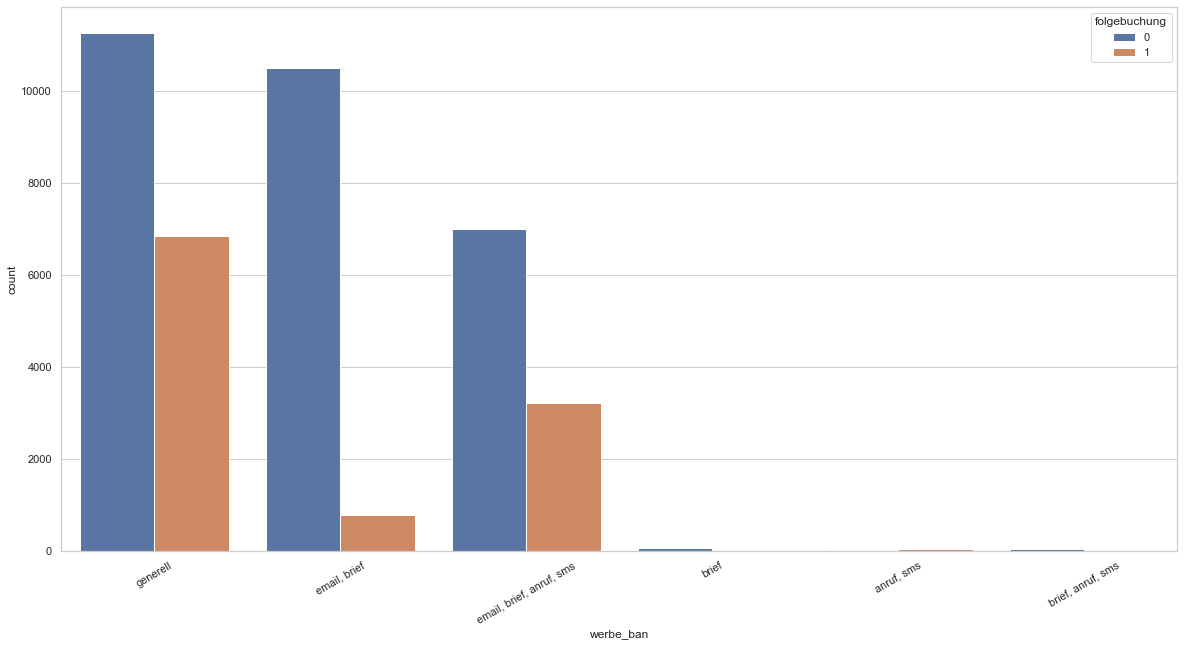

In [48]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="werbe_ban", hue="folgebuchung", data=df, order=df.werbe_ban.value_counts().iloc[1:7].index)
ax.set_xticklabels(labels=df.werbe_ban.unique()[1:7], rotation=30);

Club member since first booking

In [49]:
print(f"Bookings with club member status:\n{df.kundenclub.value_counts()}")

print(f"\nClub member bookings by repeaters:\n{df[df.repeater == 1]['kundenclub'].value_counts()}")

print(f"\nBookings as club member by repeaters doing their 1st reservation\n{df.query('repeater == 1 & erstbuchung == 1')['kundenclub'].value_counts()}")

print(f"\nThe distribution of club member bookings among frequent guests contrasts with the general distribution.\nShould be considered to drop for logit regression.")

Bookings with club member status:
0    152094
1     46020
Name: kundenclub, dtype: int64

Club member bookings by repeaters:
1    43994
0    19678
Name: kundenclub, dtype: int64

Bookings as club member by repeaters doing their 1st reservation
1    15722
0     8314
Name: kundenclub, dtype: int64

The distribution of club member bookings among frequent guests contrasts with the general distribution.
Should be considered to drop for logit regression.


#### club member and followup bookings
strong predictor

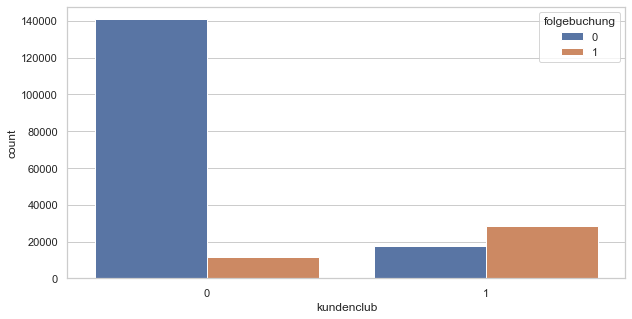

In [50]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="kundenclub", hue="folgebuchung", data=df)

#### booking channel and followup bookings
absolute

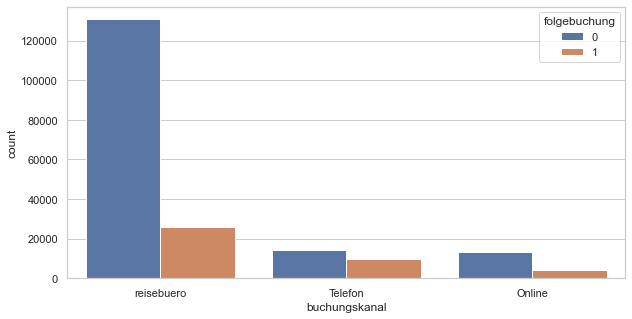

In [51]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="buchungskanal", hue="folgebuchung", data=df)

relative

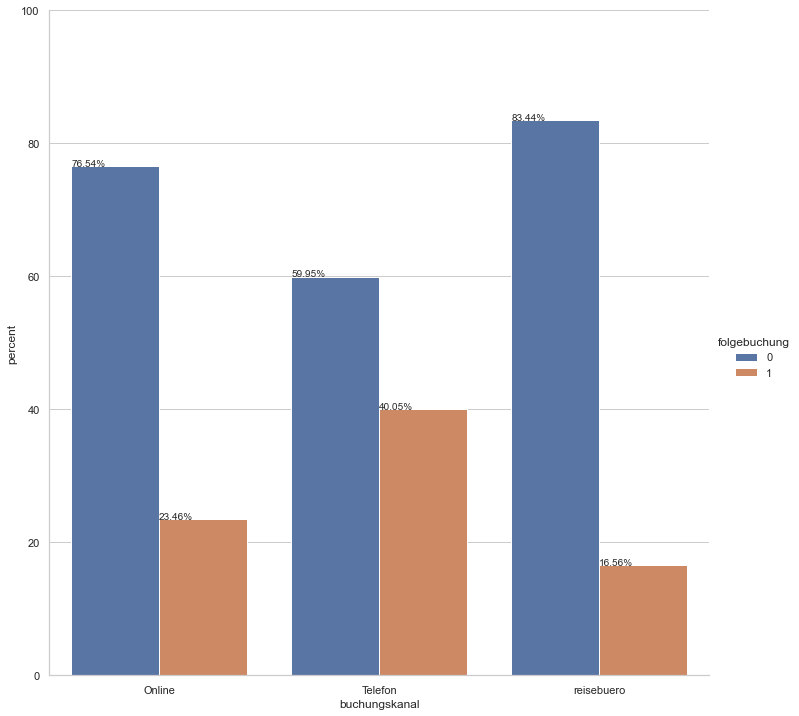

In [52]:
x,y = 'buchungskanal', 'folgebuchung'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### repeater booking more than one location

In [53]:
df.query("repeater == 1")[["kunden_id", "destination", "buchungsdatum", "anreisedatum"]].sort_values(by=["kunden_id"])[2:10]

,kunden_id,destination,buchungsdatum,anreisedatum
10,10,duesseldorf,2010-09-30,2010-10-30
11,10,duesseldorf,2011-10-11,2011-10-23
12,10,duesseldorf,2012-10-15,2012-11-06
15,13,duesseldorf,2011-10-22,2011-10-30
16,13,linz,2011-11-25,2011-12-03
17,13,linz,2012-12-07,2012-12-19
18,13,linz,2017-11-20,2017-12-19
22,17,duesseldorf,2011-12-01,2012-04-14


#### room categories

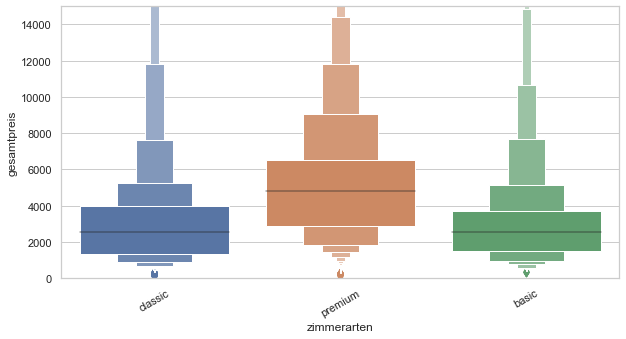

In [54]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="zimmerarten", y= "gesamtpreis", data=df)
ax.set(ylim=(0, 15_000));
ax.set_xticklabels(labels=df.zimmerarten.unique(), rotation=30);

#### Cities guest are coming from

In [55]:
df.ort.value_counts().head(10) 

Berlin        7132
Köln          4794
Hamburg       4233
München       3476
Essen         1555
Düsseldorf    1493
Frankfurt     1449
Hannover      1395
Dortmund      1371
Wuppertal     1330
Name: ort, dtype: int64

In [56]:
#ändern geopandas karten

## Lead time
by booking channel

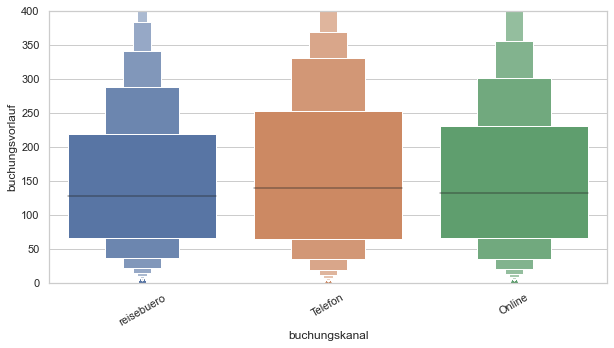

In [57]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="buchungskanal", y= "buchungsvorlauf", data=df)
ax.set(ylim=(0, 400));
ax.set_xticklabels(labels=df.buchungskanal.unique(), rotation=30);

by room category

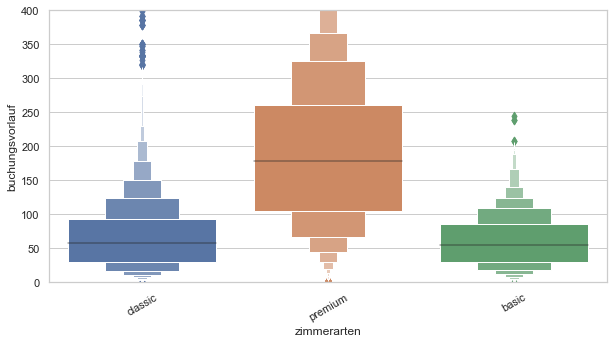

In [58]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="zimmerarten", y= "buchungsvorlauf", data=df)
ax.set(ylim=(0, 400));
ax.set_xticklabels(labels=df.zimmerarten.unique(), rotation=30);

## Channel
by citizen

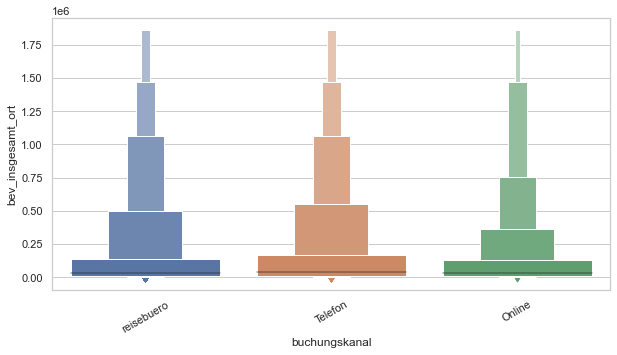

In [59]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="buchungskanal", y= "bev_insgesamt_ort", data=df)
ax.set_xticklabels(labels=df.buchungskanal.unique(), rotation=30);

by regiostar

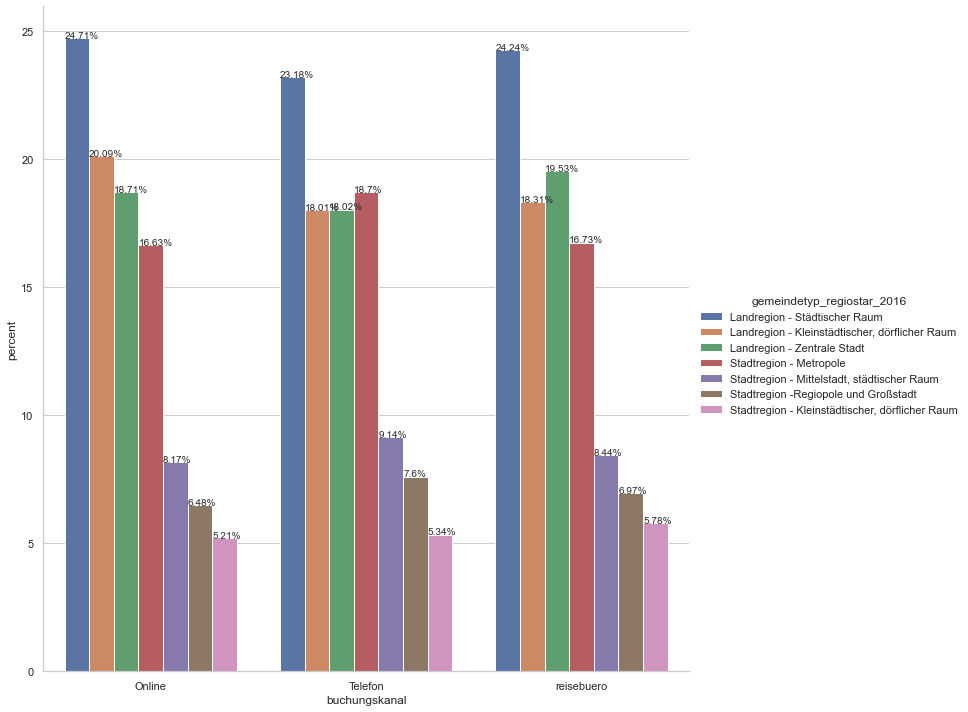

In [60]:
x,y = 'buchungskanal', 'gemeindetyp_regiostar_2016'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

by state

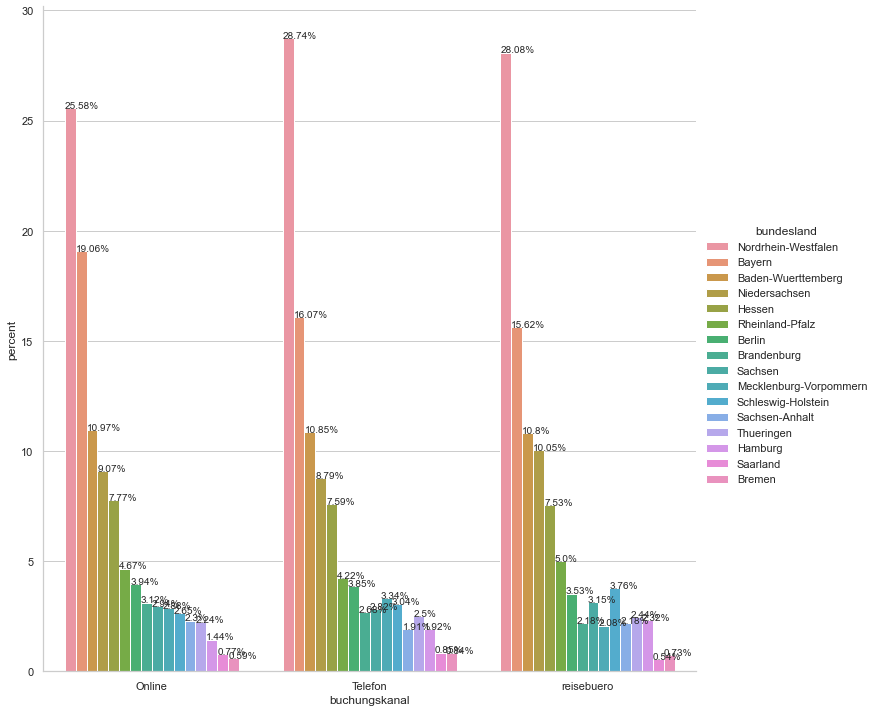

In [61]:
x,y = 'buchungskanal', 'bundesland'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
#g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## purchasing power
#### by booking channel

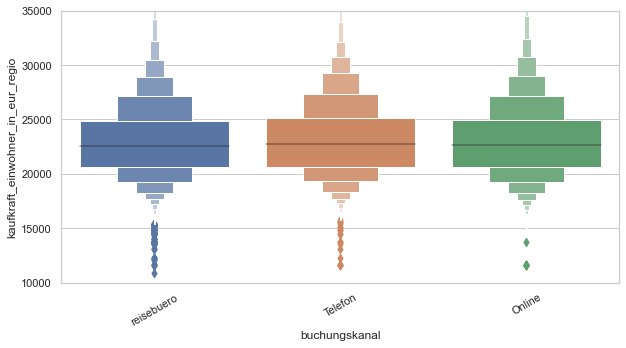

In [62]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="buchungskanal", y= "kaufkraft_einwohner_in_eur_regio", data=df)
ax.set(ylim=(10_000, 35_000));
ax.set_xticklabels(labels=df.buchungskanal.unique(), rotation=30);

#### by room category

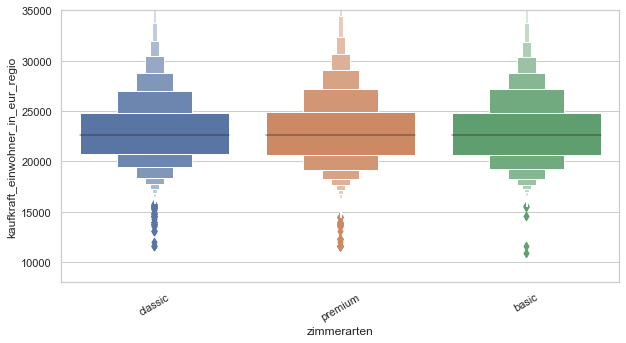

In [63]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="zimmerarten", y= "kaufkraft_einwohner_in_eur_regio", data=df)
ax.set(ylim=(8_000, 35_000));
ax.set_xticklabels(labels=df.zimmerarten.unique(), rotation=30);

#### by leadtime (and room category)

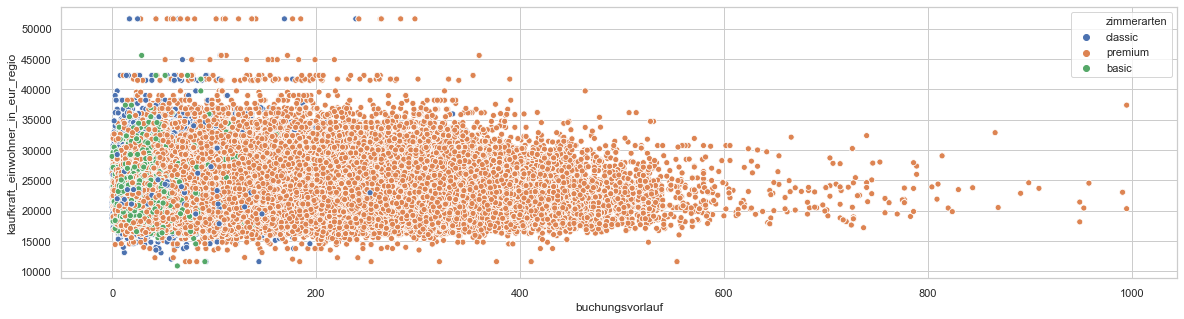

In [64]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="buchungsvorlauf", y="kaufkraft_einwohner_in_eur_regio", hue="zimmerarten", data=df)

### VIPs
#### by room category

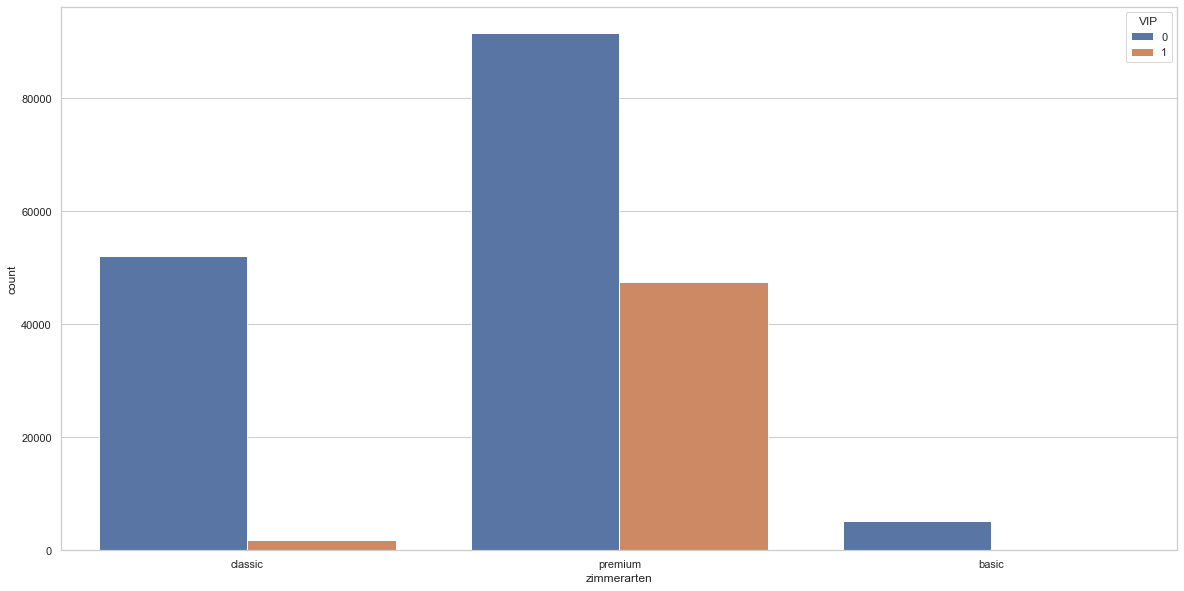

In [65]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="zimmerarten", hue="VIP", data=df)

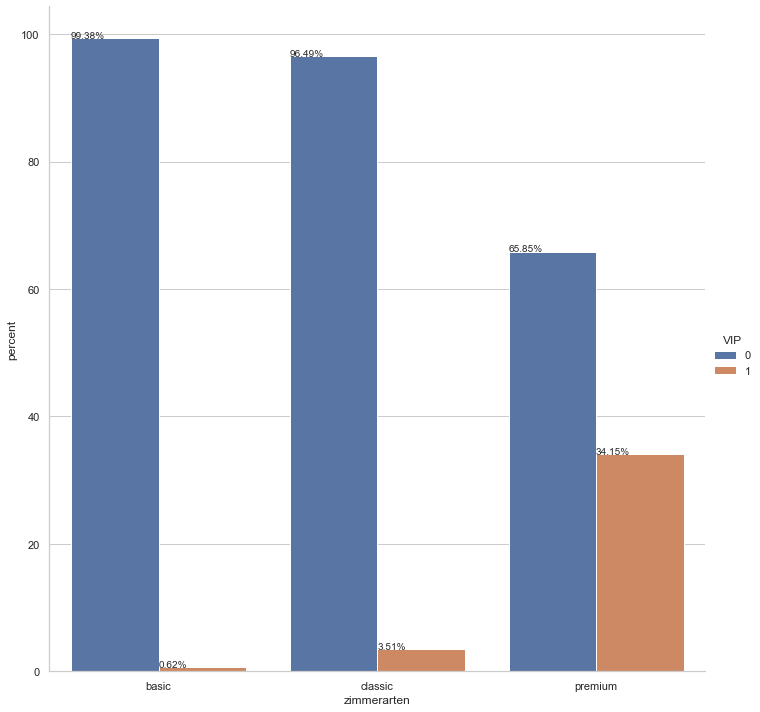

In [66]:
x,y = 'zimmerarten', 'VIP'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

####  by age group

premium    139088
classic     53873
basic        5153
Name: zimmerarten, dtype: int64


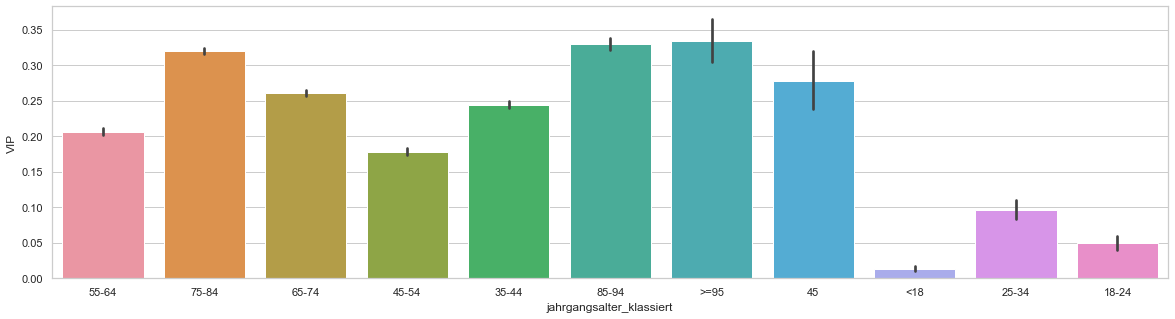

In [67]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="VIP", data=df)

# for each Destination individually

In [68]:
df_dus = df[df.destination == 'duesseldorf']
df_lin = df[df.destination == 'linz']
df_sai = df[df.destination == 'saint etienne']
df_cha = df[df.destination == 'chalons-sur-marne']
df_via = df[df.destination == 'viana do castelo']

df_dus.shape[0] + df_lin.shape[0] + df_sai.shape[0] + df_cha.shape[0] + df_via.shape[0] == df.shape[0]

True

#### lead time

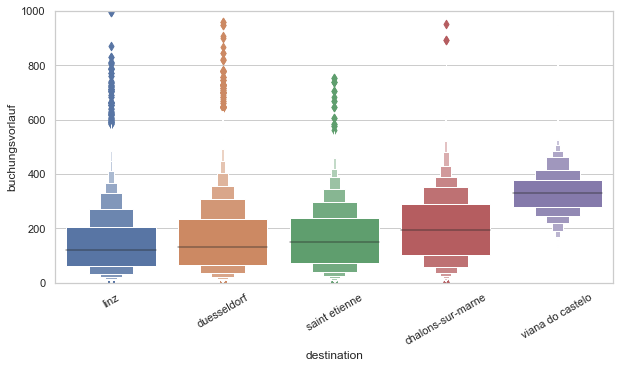

In [69]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "buchungsvorlauf", data=df)
ax.set(ylim=(0, 1_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### regiostar

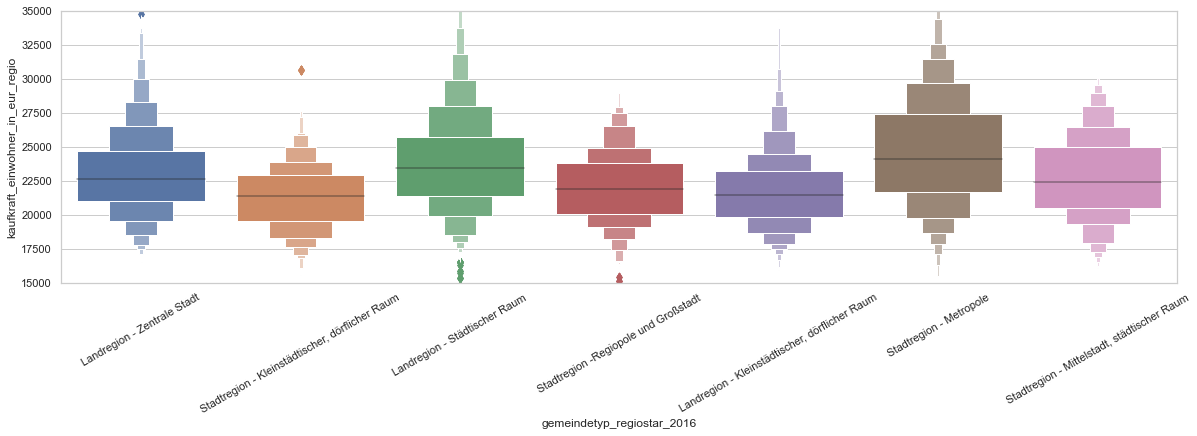

In [70]:
plt.figure(figsize=(20,5))
ax = sns.boxenplot(x="gemeindetyp_regiostar_2016", y= "kaufkraft_einwohner_in_eur_regio", data=df)
ax.set(ylim=(15_000, 35_000));
ax.set_xticklabels(labels=df.gemeindetyp_regiostar_2016.unique(), rotation=30);

#### purchasing power

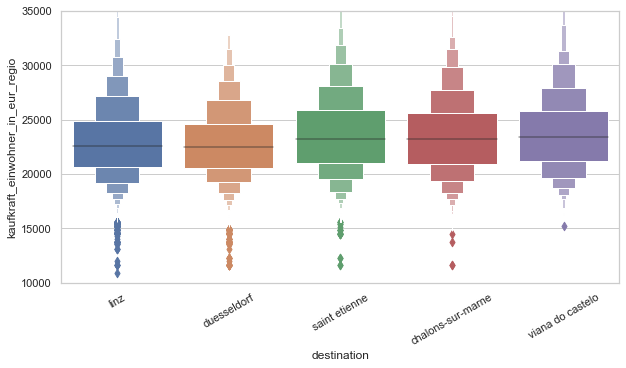

In [71]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "kaufkraft_einwohner_in_eur_regio", data=df)
ax.set(ylim=(10_000, 35_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### VIP

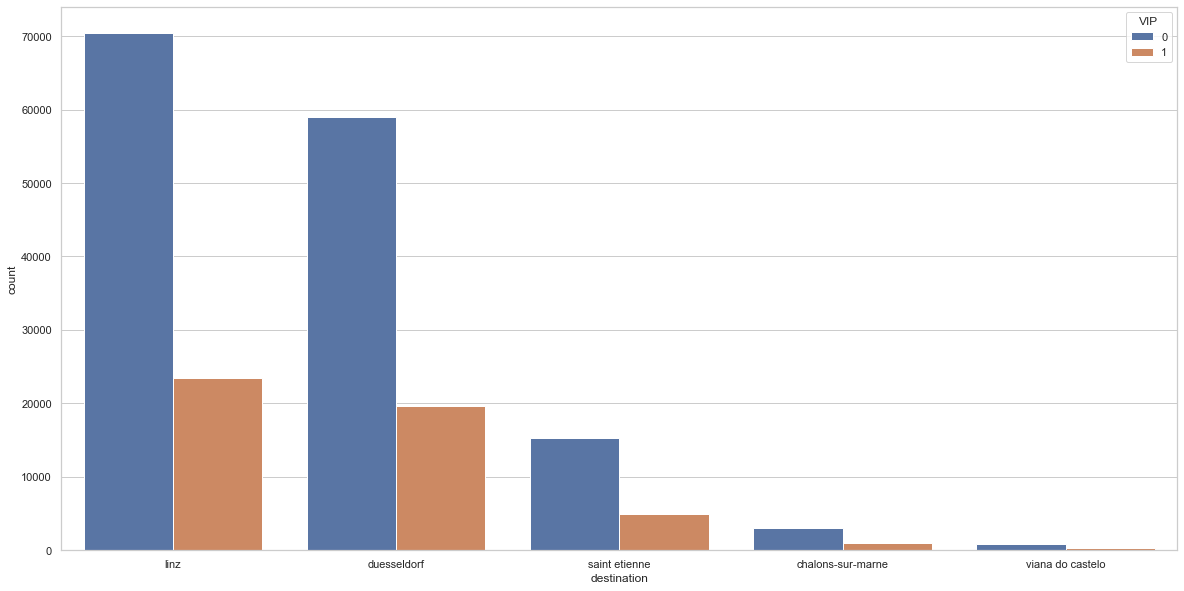

In [72]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="destination", hue="VIP", data=df)

#### Duration of stay

In [73]:
print(f"Düsseldorf:\n{df_dus.aufenthalt.value_counts().head()}")
print(f"\nLinz:\n{df_lin.aufenthalt.value_counts().head()}")
print(f"\nSaint Etienne:\n{df_sai.aufenthalt.value_counts().head()}")
print(f"\nChalons-sur-Marne:\n{df_cha.aufenthalt.value_counts().head()}")
print(f"\nViana do Castelo:\n{df_via.aufenthalt.value_counts().head()}")
#ändern in subplot

Düsseldorf:
7    30178
4    24872
5    12702
9     5371
3     2548
Name: aufenthalt, dtype: int64

Linz:
7    35749
4    22508
5    16226
3     6682
8     3355
Name: aufenthalt, dtype: int64

Saint Etienne:
7     15616
5      2933
14     1091
8       347
9       155
Name: aufenthalt, dtype: int64

Chalons-sur-Marne:
7    2475
5     569
4     543
9     315
3      43
Name: aufenthalt, dtype: int64

Viana do Castelo:
7     694
10    321
9      26
11     16
14     15
Name: aufenthalt, dtype: int64


#### Lead time and room category

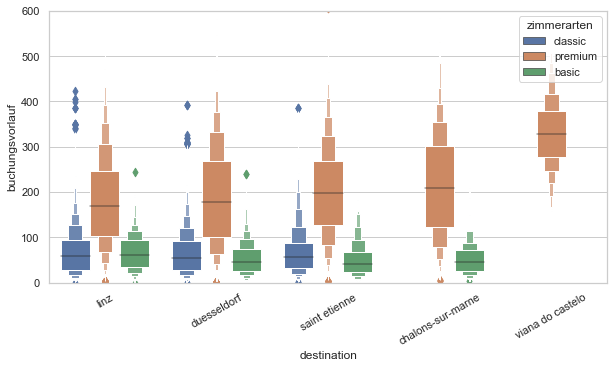

In [74]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "buchungsvorlauf", hue="zimmerarten", data=df)
ax.set(ylim=(0,600));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### Purchasing power and room category

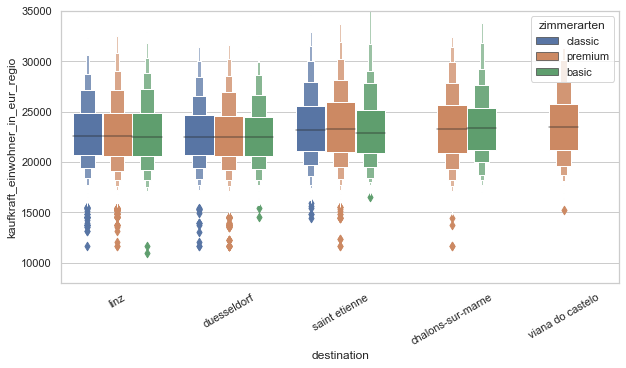

In [75]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "kaufkraft_einwohner_in_eur_regio", hue="zimmerarten", data=df)
ax.set(ylim=(8_000, 35_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### Purchasing power and regiostar city type

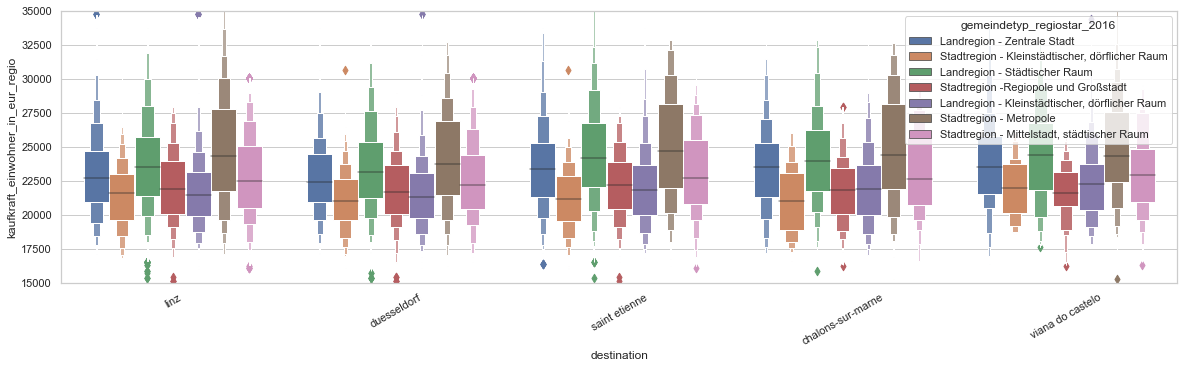

In [76]:
plt.figure(figsize=(20,5))
ax = sns.boxenplot(x="destination", y= "kaufkraft_einwohner_in_eur_regio", hue="gemeindetyp_regiostar_2016", data=df)
ax.set(ylim=(15_000, 35_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### Booking channel

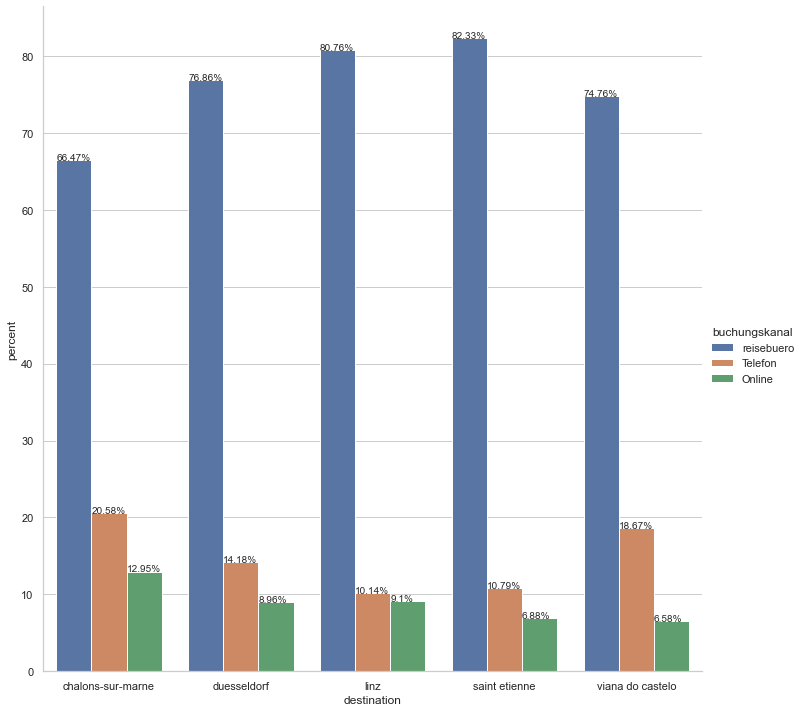

In [77]:
x,y = 'destination', 'buchungskanal'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### by room category

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


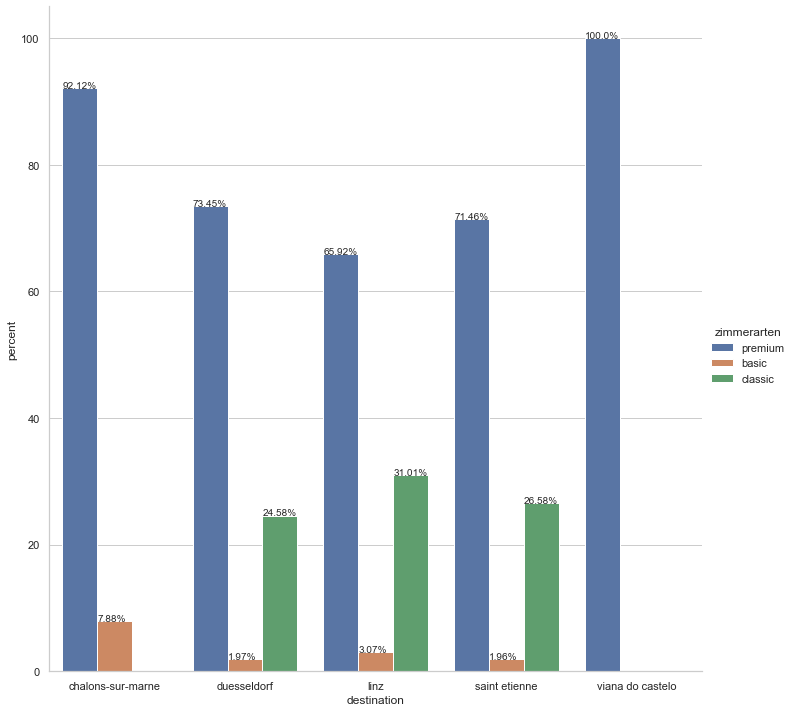

In [78]:
x,y = 'destination', 'zimmerarten'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## over time

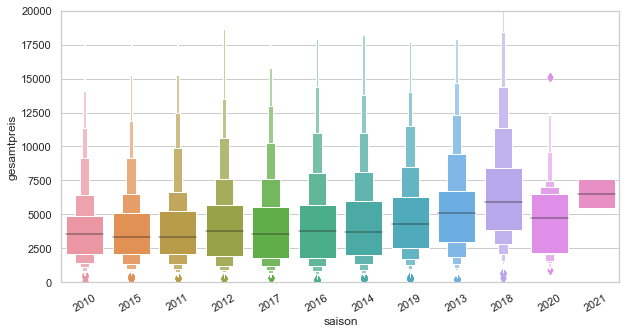

In [79]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="saison", y= "gesamtpreis", data=df)
ax.set(ylim=(0, 20_000));
ax.set_xticklabels(labels=df.saison.unique(), rotation=30);

#### Outlier per person and season

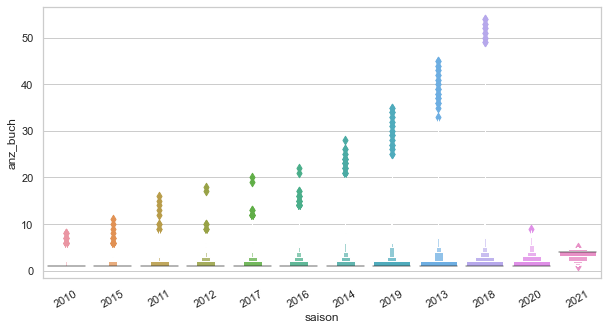

In [80]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="saison", y= "anz_buch", data=df)
#ax.set(ylim=(0, 20_000));
ax.set_xticklabels(labels=df.saison.unique(), rotation=30);

#### Booking, arrival and depature
by quarter, month, week and weekday

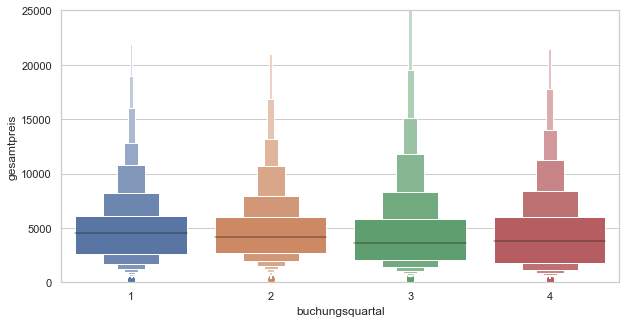

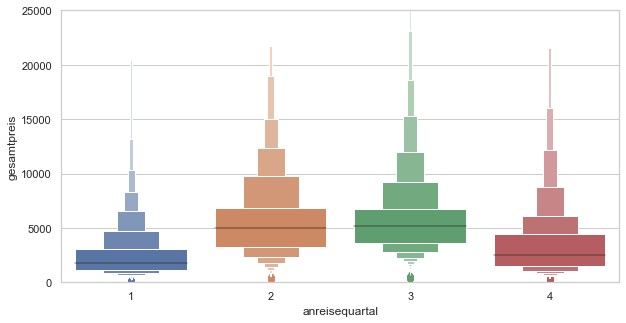

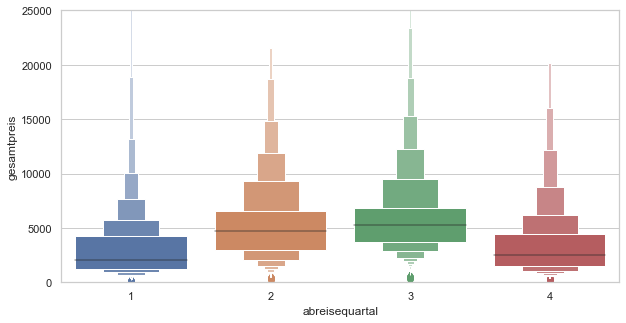

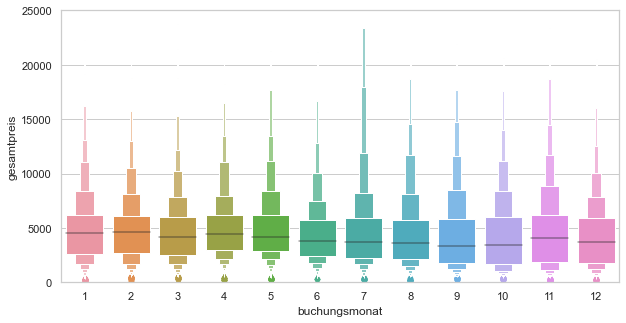

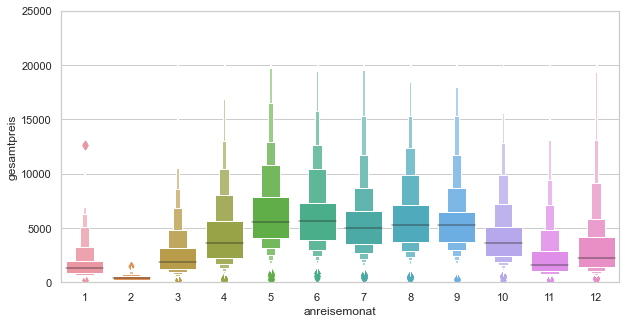

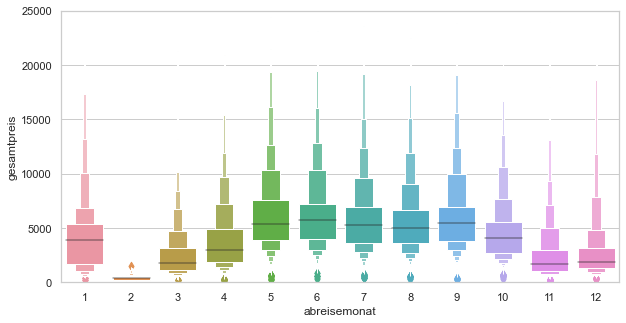

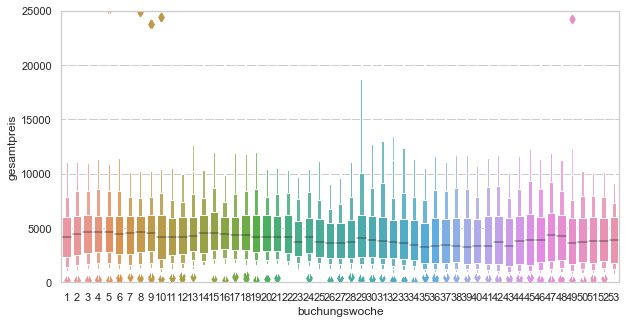

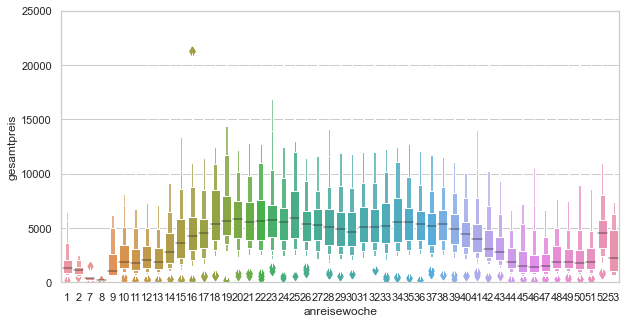

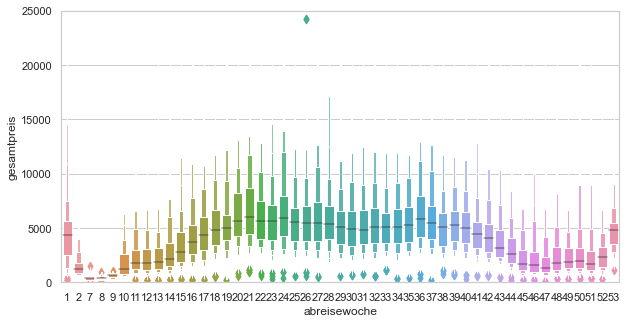

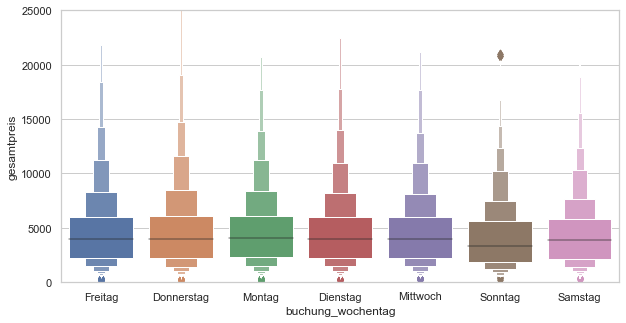

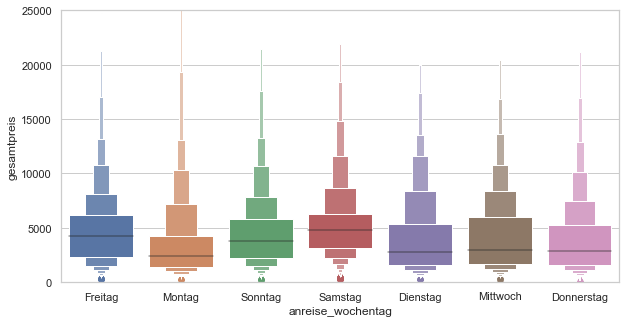

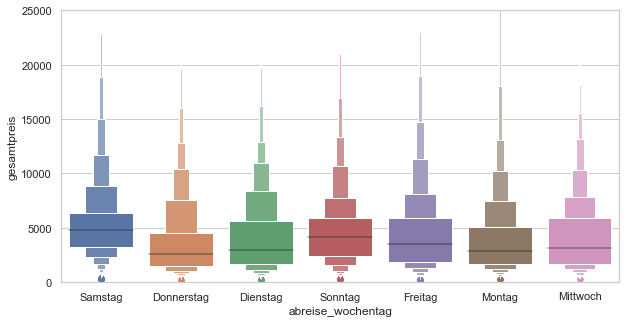

In [94]:
column_list = [ "buchungsquartal", "anreisequartal", "abreisequartal",
                "buchungsmonat", "anreisemonat", "abreisemonat",
                "buchungswoche", "anreisewoche", "abreisewoche",
                "buchung_wochentag", "anreise_wochentag", "abreise_wochentag"
              ]

for entry in column_list:
    plt.figure(figsize=(10,5))
    ax = sns.boxenplot(x=entry, y= "gesamtpreis", data=df)
    ax.set(ylim=(0, 25_000));

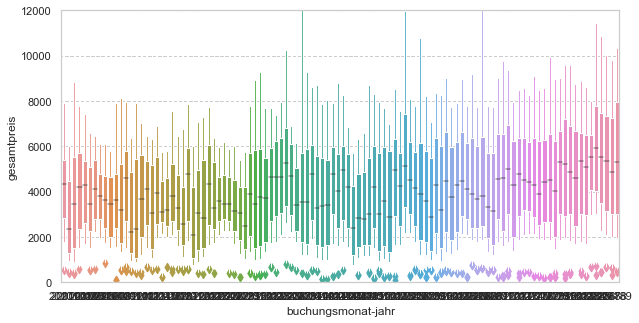

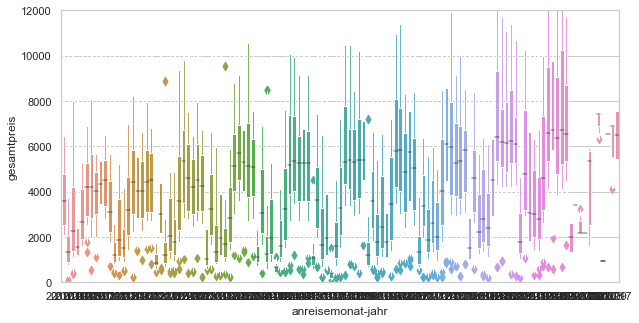

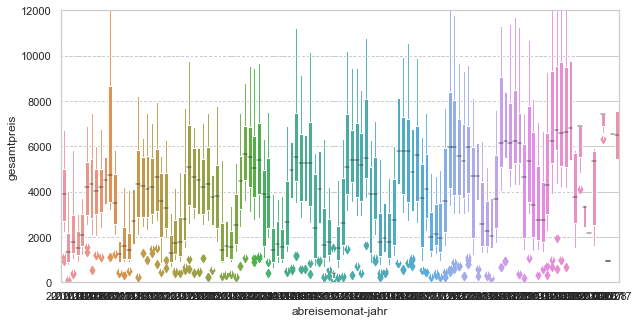

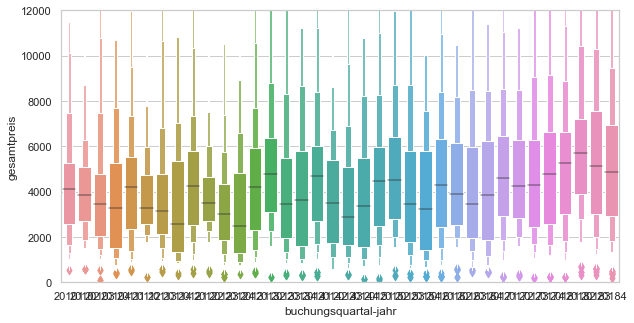

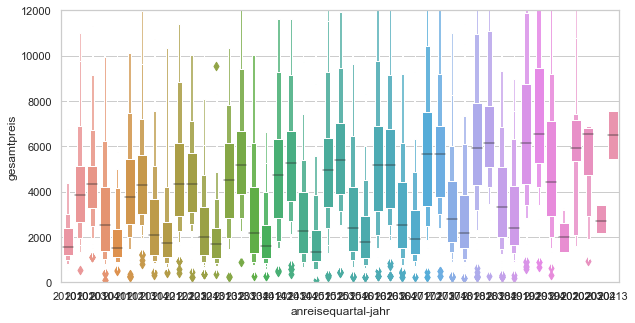

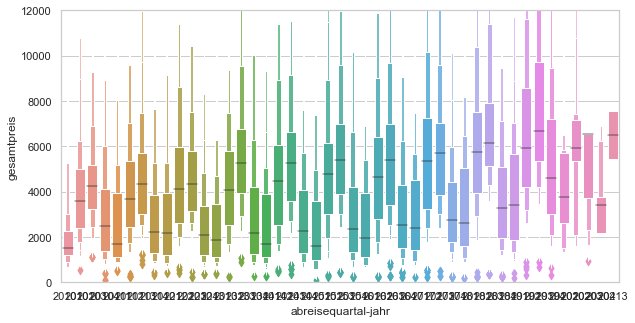

In [96]:
column_list = [ "buchungsmonat-jahr", "anreisemonat-jahr", "abreisemonat-jahr",
                "buchungsquartal-jahr", "anreisequartal-jahr", "abreisequartal-jahr"
              ]

for entry in column_list:
    plt.figure(figsize=(10,5))
    ax = sns.boxenplot(x=entry, y= "gesamtpreis", data=df)
    ax.set(ylim=(0, 12_000));
    
    #ändern sortieren

### Histograms

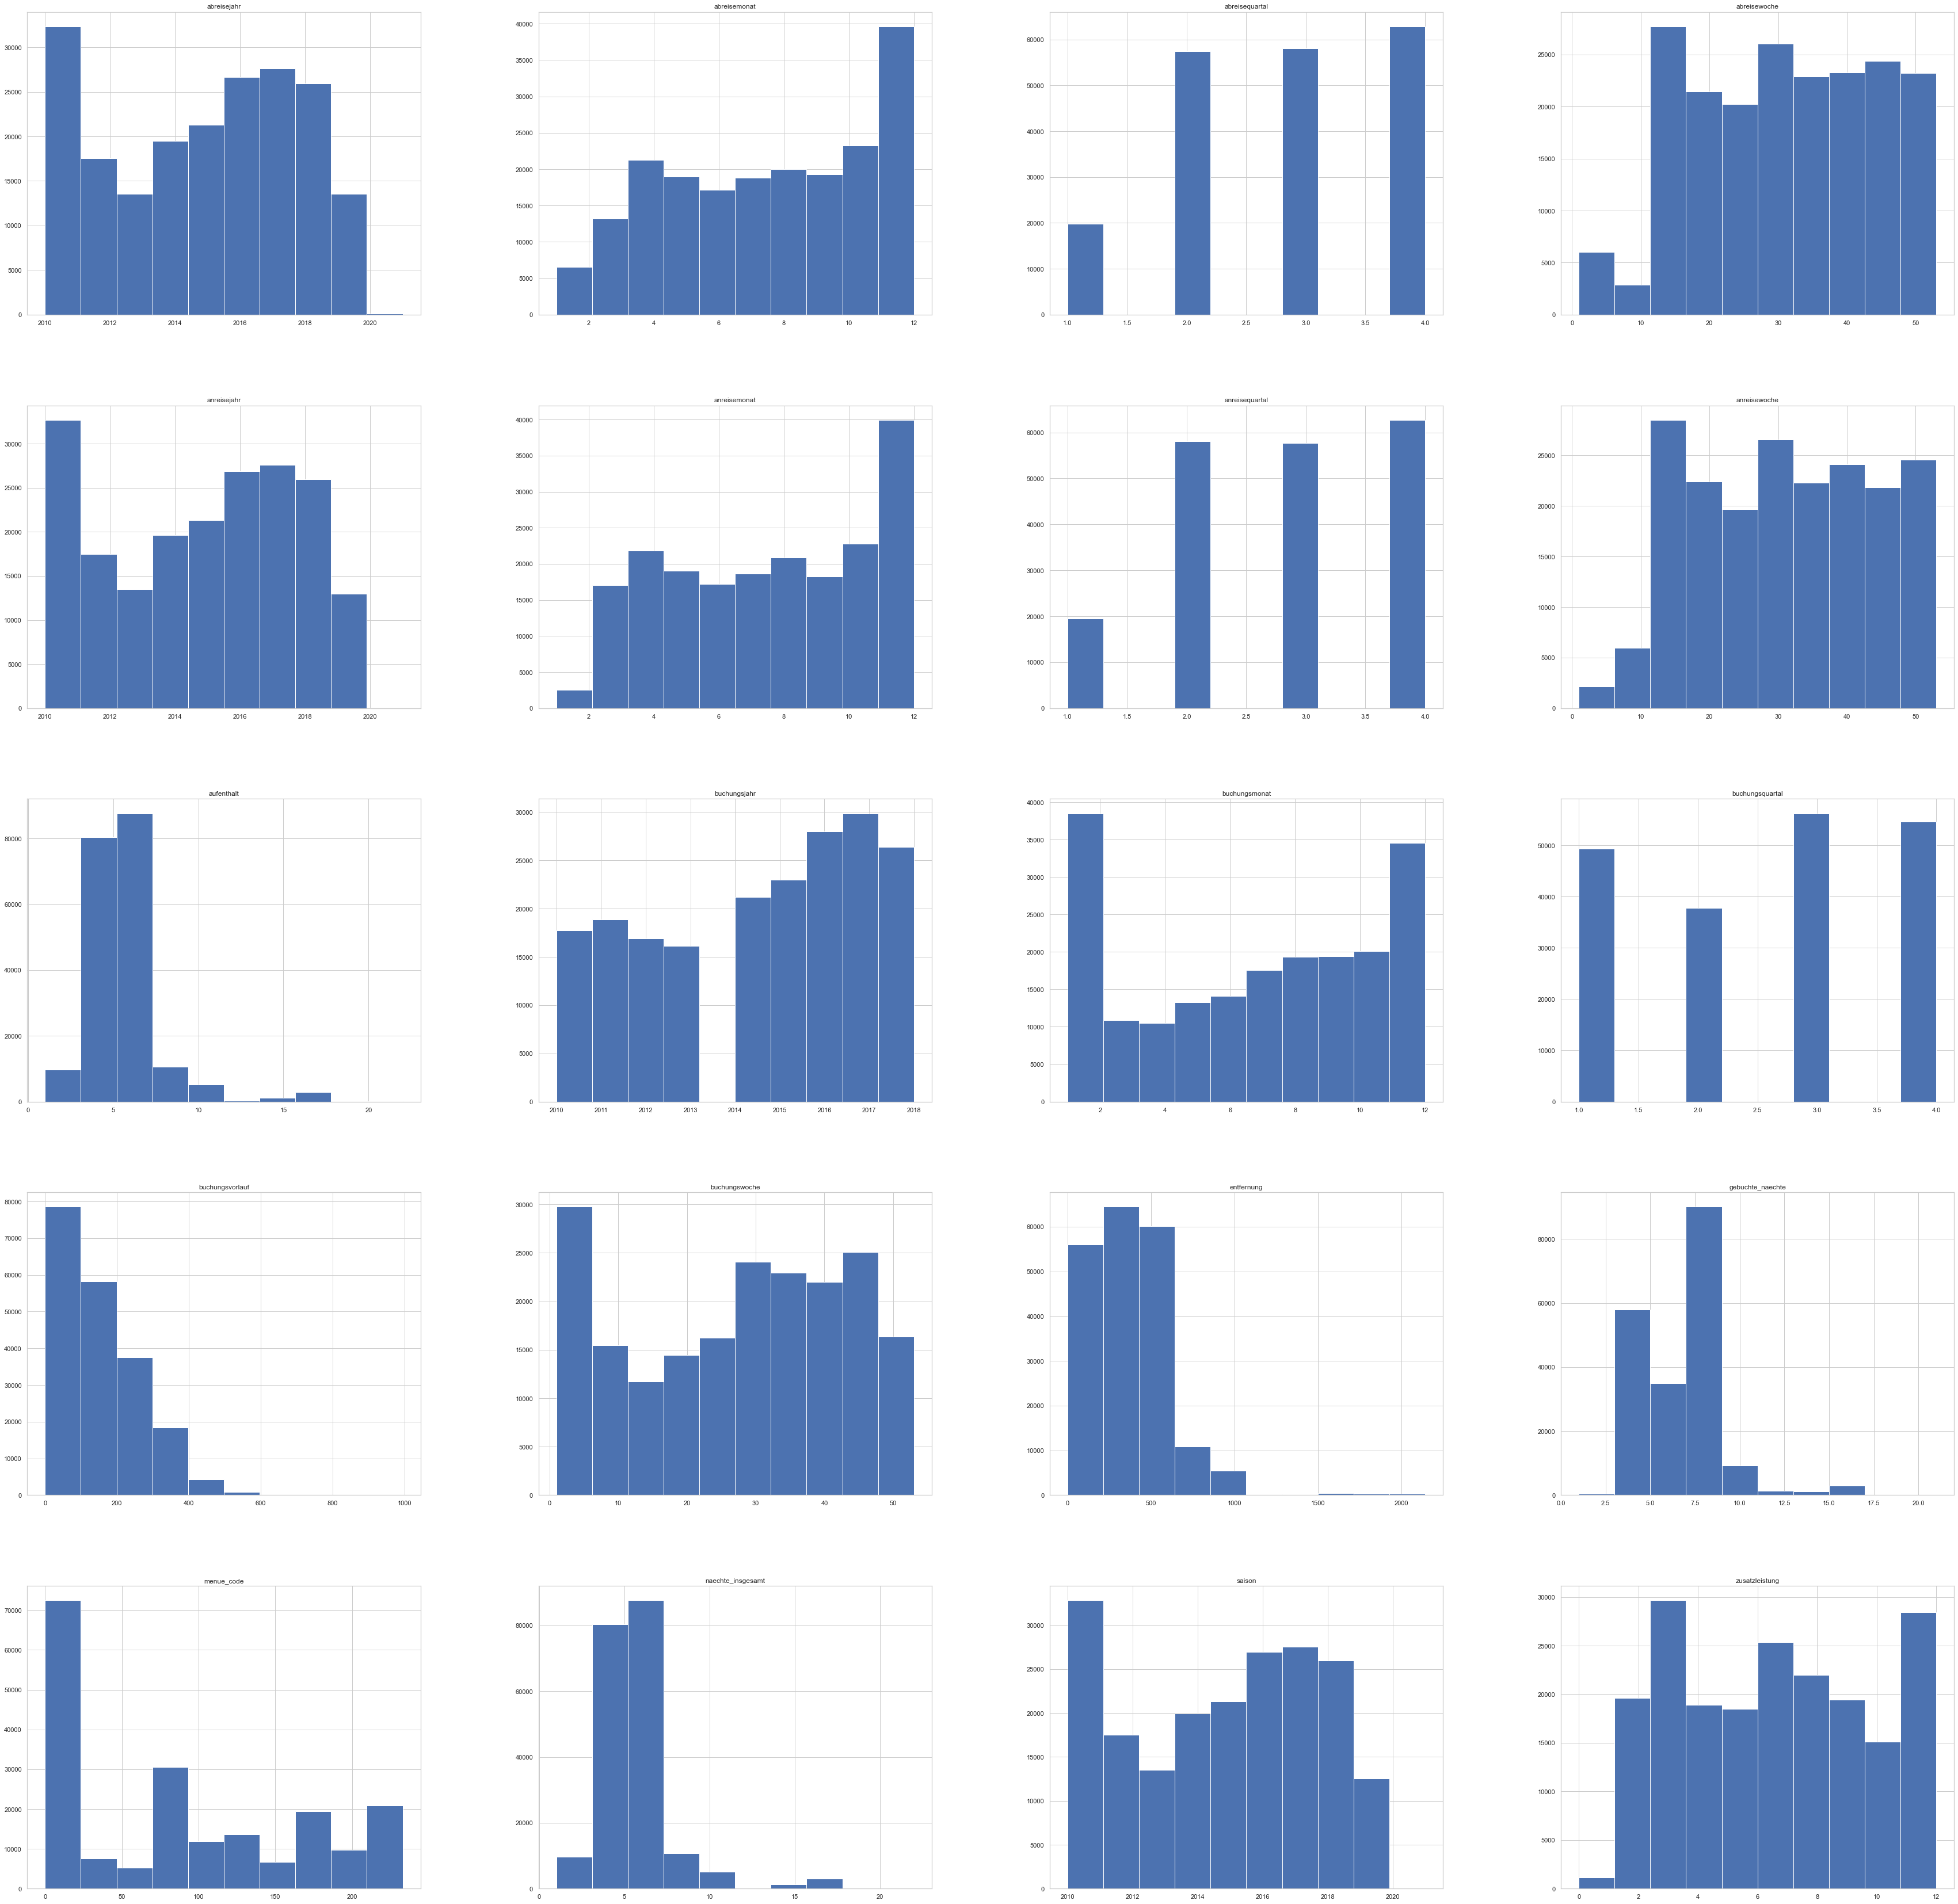

In [82]:
column_list = ["naechte_insgesamt", "gebuchte_naechte", "saison", "zimmerarten", "entfernung", 
               "menue_code", "zusatzleistung", "buchung_wochentag", "buchungsmonat",
               "buchungsjahr", "buchungswoche", "buchungsquartal","anreise_wochentag", 
               "anreisemonat", "anreisejahr", "anreisewoche", "anreisequartal", "abreise_wochentag",
               "abreisemonat", "abreisejahr", "abreisewoche", "abreisequartal", "aufenthalt", "buchungsvorlauf"]

tmp = df[column_list].copy()
tmp.hist(figsize=(60,60));

#### Conclusions:
- main arrival and depature day is saturday, should be checked if similar for each destination
- december seems to be high season, january very few arrivals, maybe due to long december bookings

### Scatterplots
#### Price per night and total amount

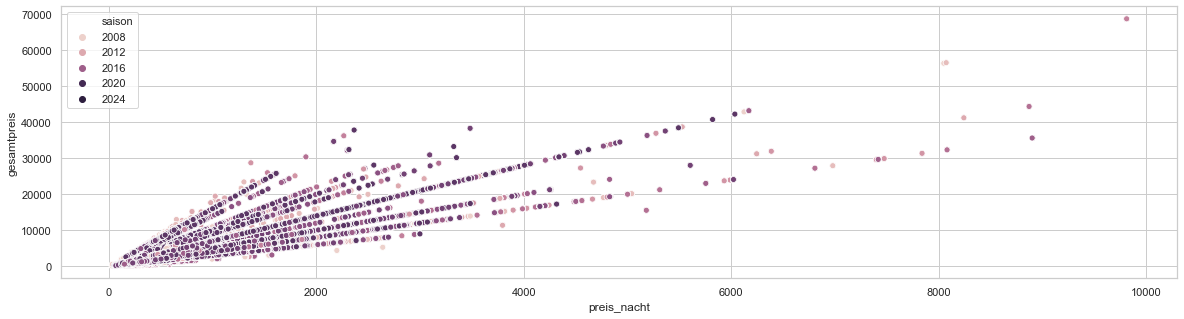

In [83]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="preis_nacht", y="gesamtpreis", hue="saison", data=df)

#### Price per person and total amount

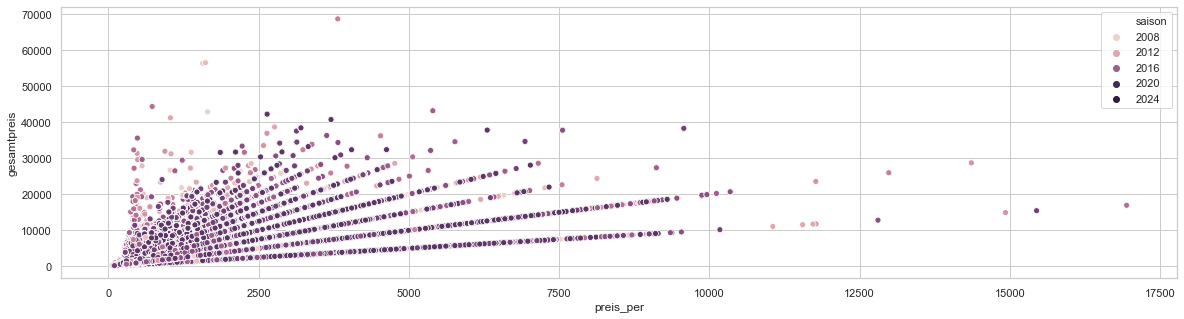

In [84]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="preis_per", y="gesamtpreis", hue="saison", data=df)

#### Arrival and departure date

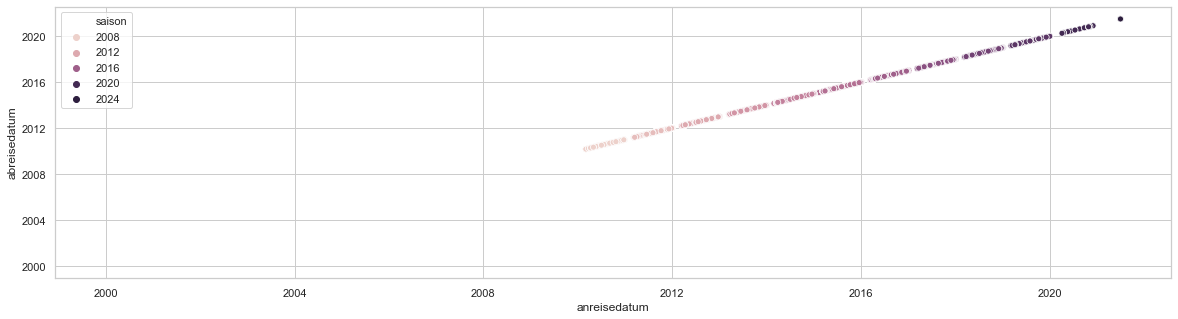

In [85]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="anreisedatum", y="abreisedatum", hue="saison", data=df)

#### Duration of stay and bookingrows

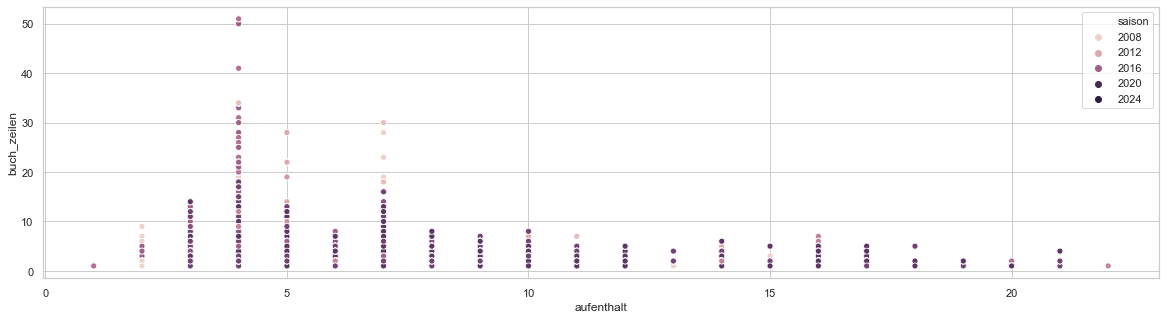

In [86]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="aufenthalt", y="buch_zeilen", hue="saison", data=df)

## Correlations
#### followup booking

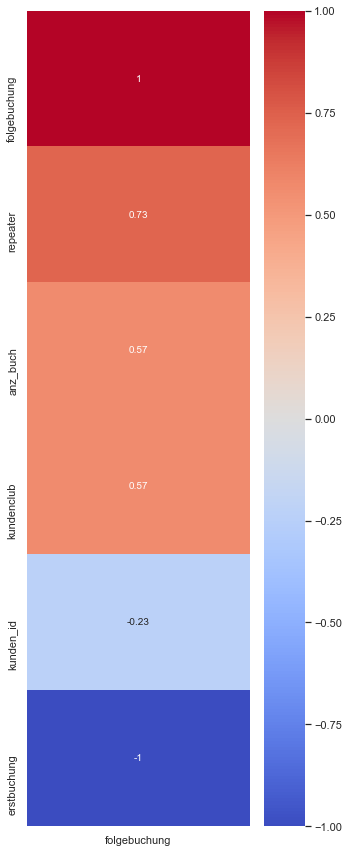

In [87]:
corr_heat = df.corr()
corr_heat = corr_heat.query("folgebuchung < -0.2 or folgebuchung > 0.2")
plt.figure(figsize=(5,15))
res = sns.heatmap(corr_heat[['folgebuchung']].sort_values(by=['folgebuchung'],ascending=False), vmin=-1, cmap='coolwarm',annot=True);

#### followup booking

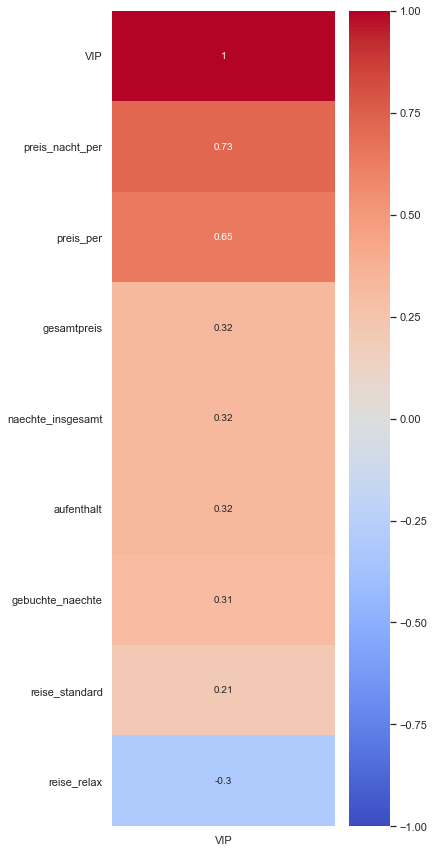

In [88]:
corr_heat = df.corr()
corr_heat = corr_heat.query("VIP < -0.2 or VIP > 0.2")
plt.figure(figsize=(5,15))
res = sns.heatmap(corr_heat[['VIP']].sort_values(by=['VIP'],ascending=False), vmin=-1, cmap='coolwarm',annot=True);

### Heatmap (correlogram)

In [89]:
plt.sfigure(figsize=(45,30))
sns.heatmap(df.corr(), mask = np.triu(df.corr()), fmt=".2f", cmap='coolwarm')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'sfigure'

with dummies

In [ ]:
col_list = ["folgebuchung", "destination", "gemeindetyp_regiostar_2016",
            "saison", "jahrgangsalter_klassiert", "buchungskanal", "zimmerarten", 
            "kundenclub", "buchungsvorlauf", "zahler"]

X_dum=pd.get_dummies(df[col_list].copy())
mask = np.triu(X_dum.corr())
plt.figure(figsize=(45,30))
ax = sns.heatmap(round(X_dum.corr()*100,0), mask=mask, cmap='coolwarm')
plt.savefig('img/correlogram.png')

#### saving dataframe to new file

In [ ]:
df.to_csv("data/dataset_w_feature.csv", encoding="iso-8859-15")